In [1]:
#Cleaning and Manipulating Data

In [2]:
import pandas as pd

# Replace 'your_excel_file.xlsx' with the path to your Excel file
excel_file = 'sales data.xlsx'

# Load Excel data into a pandas DataFrame
df = pd.read_excel(excel_file)

# Now, you can work with the data in the 'df' DataFrame
# For example, you can print the first few rows of the DataFrame
df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,8/23/2020,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,6/26/2019,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,10/22/2019,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546


In [3]:
missing_values = df.isnull().sum()

print("Missing Values:")

print(missing_values[missing_values > 0])

Missing Values:
order_value_EUR    5
device_type        5
dtype: int64


In [4]:
from sklearn.impute import SimpleImputer

target_column = 'order_value_EUR'

# Create a SimpleImputer instance to impute missing values with a strategy (e.g., 'mean', 'median', 'most_frequent')
# Other strategies include 'constant' to replace missing values with a constant value
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the selected column and transform it to impute missing values
df[target_column] = imputer.fit_transform(df[[target_column]])

df.isnull().sum()

country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        5
order_id           0
dtype: int64

In [5]:
df.device_type

0       Tablet
1       Tablet
2           PC
3       Mobile
4           PC
         ...  
996         PC
997     Tablet
998     Tablet
999         PC
1000        PC
Name: device_type, Length: 1001, dtype: object

In [6]:
target_column = 'device_type'

# Create a SimpleImputer instance to impute missing values with a strategy (e.g., 'mean', 'median', 'most_frequent')
# Other strategies include 'constant' to replace missing values with a constant value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the selected column and transform it to impute missing values
imputed_values = imputer.fit_transform(df[[target_column]])

# Flatten the imputed values array if needed
imputed_values = imputed_values.flatten()

# Assign the imputed values back to the target column in the original DataFrame
df[target_column] = imputed_values

df.isnull().sum()

country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        0
order_id           0
dtype: int64

In [7]:
mixed_data = df['cost']

# Create an empty list to store non-numeric values
non_numeric_values = []

# Iterate through the elements in the variable
for value in mixed_data:
    if isinstance(value, str) and not value.isnumeric():
        non_numeric_values.append(value)

# Print the non-numeric values
print("Non-Numeric Values:")
print(non_numeric_values)

Non-Numeric Values:
['XXX']


In [8]:
mask = (df['cost'] == 'XXX')

# Remove rows that match the mask
df = df[~mask]

In [9]:
df['cost'] = df['cost'].astype(float)

# Print the DataFrame with the corrected data type
print(df.dtypes)

country             object
order_value_EUR    float64
cost               float64
date                object
category            object
customer_name       object
sales_manager       object
sales_rep           object
device_type         object
order_id            object
dtype: object


In [10]:
df['date'] = df['date'].astype('datetime64[ns]')

In [11]:
df_sorted = df.sort_values(by='cost', ascending=True)

In [12]:
df_sorted

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
422,Sweden,15100.570,12113.68,2019-02-20,Games,"Murray, Reichel and Nolan",Maxie Marrow,Tarrah Castelletti,PC,89-2424262
275,France,16388.900,13430.70,2020-03-15,Electronics,West-Cummings,Othello Bowes,Crysta Halls,PC,30-9690927
17,Sweden,15817.050,13743.44,2019-10-03,Clothing,Kihn Inc,Maxie Marrow,Anita Woakes,PC,26-9787272
971,Netherlands,105357.645,14102.75,2020-07-02,Clothing,Johns and Sons,Denice Amberg,Nero Harbisher,PC,38-5910704
138,Sweden,17524.020,14122.61,2020-12-02,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,02-3364199
...,...,...,...,...,...,...,...,...,...,...
766,Sweden,325331.990,264592.51,2019-12-23,Games,Altenwerth-Konopelski,Maxie Marrow,Caro Morfield,Mobile,57-4142025
242,Luxembourg,312928.720,270401.71,2019-12-12,Beauty,Altenwerth-Konopelski,Ilsa Kob,Jocelyn Laurentino,Tablet,98-5257166
413,Netherlands,353925.060,287528.72,2020-04-12,Clothing,Corwin and Sons,Denice Amberg,Nero Harbisher,PC,36-2694099
84,Ireland,361182.870,288368.40,2019-02-12,Books,Smith Group,Glenine Suttaby,Bunnie Tonbridge,PC,44-1953194


In [13]:
df_france = df[df['country'] == 'France']

# Display the filtered DataFrame
df_france

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
7,France,96795.99,81395.75,2019-06-21,Appliances,Connelly-Mohr,Othello Bowes,Avrit Chanders,PC,32-3124563
16,France,65193.88,53113.45,2019-04-10,Beauty,Friesen and Sons,Othello Bowes,Maighdiln Upcraft,PC,74-1131921
18,France,54079.04,45031.62,2020-05-29,Games,"Lueilwitz, Kerluke and Lesch",Othello Bowes,Avrit Chanders,PC,15-6838362
...,...,...,...,...,...,...,...,...,...,...
993,France,167072.72,135044.88,2019-10-21,Clothing,O'Connell-Mitchell,Othello Bowes,Ora Grennan,PC,37-6449638
994,France,157932.84,134148.15,2020-01-31,Games,"Schowalter, Lesch and Beahan",Othello Bowes,Amelina Piscopiello,PC,30-2982340
996,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531
997,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807


In [14]:
df_filtered = df[(df['country'] == 'France') & (df['category'] == 'Games')]

In [15]:
df_filtered

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
18,France,54079.04,45031.62,2020-05-29,Games,"Lueilwitz, Kerluke and Lesch",Othello Bowes,Avrit Chanders,PC,15-6838362
50,France,149500.61,125401.11,2020-07-24,Games,McGlynn-Bergstrom,Othello Bowes,Crysta Halls,PC,60-8646184
104,France,146325.53,118333.46,2020-09-08,Games,Stehr-Bogan,Othello Bowes,Crysta Halls,PC,95-8015610
137,France,133754.65,106147.69,2020-09-18,Games,Armstrong-Little,Othello Bowes,Ora Grennan,PC,52-3150154
236,France,101318.72,86657.90,2019-04-13,Games,Hilll-Vandervort,Othello Bowes,Maighdiln Upcraft,PC,54-5705354
259,France,18326.41,15067.97,2019-03-02,Games,"Schmitt, Purdy and Johnson",Othello Bowes,Ora Grennan,PC,25-6638623
303,France,82697.53,69548.62,2020-12-08,Games,Kihn Inc,Othello Bowes,Avrit Chanders,PC,47-5319780
310,France,74685.85,59166.13,2020-05-23,Games,"Lubowitz, McLaughlin and Erdman",Othello Bowes,Avrit Chanders,PC,68-0176456
346,France,99319.33,79127.71,2020-05-26,Games,Hessel-Stiedemann,Othello Bowes,Amelina Piscopiello,PC,53-3037652


In [16]:
df_filtered = df[df['country'] != 'France']

In [17]:
df_filtered

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546
5,Italy,127075.41,110924.13,2019-09-24,Clothing,Labadie and Sons,Piggy Roscrigg,Joshua Prevost,PC,57-6602854
6,Sweden,69681.43,55529.13,2020-01-25,Clothing,Romaguera-Dietrich,Maxie Marrow,Alyosha Meah,PC,78-3301264
...,...,...,...,...,...,...,...,...,...,...
990,Portugal,52209.31,41480.30,2019-03-26,Beauty,McClure Inc,Celine Tumasian,Corene Shirer,PC,05-2772504
991,Portugal,125253.59,108269.20,2020-02-17,Smartphones,"Murray, Reichel and Nolan",Celine Tumasian,Corene Shirer,PC,90-2194359
995,Netherlands,95575.75,75504.84,2020-12-23,Books,Hessel-Stiedemann,Denice Amberg,Nero Harbisher,PC,35-9372764
999,Germany,61968.26,50690.04,2020-12-27,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031


In [18]:
# Replace 'your_excel_file.xlsx' with the path to your Excel file
excel_file = 'Extra Variable.xlsx'

# Load Excel data into a pandas DataFrame
extra_vars = pd.read_excel(excel_file)

# Now, you can work with the data in the 'df' DataFrame
# For example, you can print the first few rows of the DataFrame
extra_vars.head()

,order_id,refund
0,70-0511466,43621
1,77-3489084,13385
2,65-8218141,69535
3,29-5478106,90064
4,57-6602854,61736


In [19]:
# Identify duplicate rows based on all columns
duplicates = df[df.duplicated()]

# Print duplicate rows
print("Duplicate Rows:")
duplicates

Duplicate Rows:


,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
23,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546


In [20]:
# Remove duplicate rows, keeping the first occurrence
df_no_duplicates = df.drop_duplicates()

# Print the DataFrame without duplicates
print("DataFrame without Duplicates:")
df_no_duplicates

DataFrame without Duplicates:


,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546
...,...,...,...,...,...,...,...,...,...,...
996,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531
997,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807
998,France,124784.67,106853.11,2020-05-22,Electronics,"Swaniawski, Runolfsson and Green",Othello Bowes,Ora Grennan,Tablet,44-2757396
999,Germany,61968.26,50690.04,2020-12-27,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031


In [21]:
cleaned_data = df_no_duplicates

In [22]:
cleaned_data.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546


In [23]:
merged_df = pd.merge(cleaned_data, extra_vars, on='order_id')

In [24]:
merged_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176
...,...,...,...,...,...,...,...,...,...,...,...
994,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531,27600
995,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807,69762
996,France,124784.67,106853.11,2020-05-22,Electronics,"Swaniawski, Runolfsson and Green",Othello Bowes,Ora Grennan,Tablet,44-2757396,60614
997,Germany,61968.26,50690.04,2020-12-27,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031,23360


In [25]:
# Replace 'your_excel_file.xlsx' with the path to your Excel file
excel_file = 'Extra Data.xlsx'

# Load Excel data into a pandas DataFrame
extra_data = pd.read_excel(excel_file)

# Now, you can work with the data in the 'df' DataFrame
# For example, you can print the first few rows of the DataFrame
extra_data.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,17524.02,14122.61,2020-12-02 00:00:00,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466,7964
1,France,64827.80,56043.63,1/20/2019,Appliances,Gislason-Stanton,Othello Bowes,Maighdiln Upcraft,PC,62-3312495,4974
2,Portugal,71620.08,62245.01,2019-05-02 00:00:00,Books,Schoen-Keeling,Celine Tumasian,Smitty Culverhouse,NaN,69-6259390,2809
3,Portugal,74532.02,59752.32,2020-02-04 00:00:00,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183,4260
4,Portugal,78461.13,63537.82,2020-10-05 00:00:00,Appliances,Hessel-Stiedemann,Celine Tumasian,Smitty Culverhouse,Mobile,91-4126746,6038


In [26]:
concatenated_df = pd.concat([merged_df, extra_data], ignore_index=True)

In [27]:
concatenated_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23 00:00:00,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15 00:00:00,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26 00:00:00,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22 00:00:00,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176
...,...,...,...,...,...,...,...,...,...,...,...
1004,Spain,84900.24,73701.90,7/14/2020,Clothing,"Farrell, Swaniawski and Crist",Emalia Dinse,Perri Aldersley,PC,60-6998932,7598
1005,Finland,116563.40,92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,2928
1006,UK,156585.22,126599.15,8/30/2020,Accessories,"Hermiston, Simonis and Wisoky",Jessamine Apark,Winny Agnolo,PC,64-5761908,9376
1007,Spain,178763.42,146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,5153


In [28]:
country_analysis = concatenated_df['country'].value_counts()

In [29]:
country_analysis

country
Portugal       242
France         233
Sweden         183
UK             102
Finland         45
Ireland         43
Bulgaria        30
Spain           28
Netherlands     28
Germany         24
Luxembourg      22
Denmark         11
Italy           10
Belgium          6
Austria          2
Name: count, dtype: int64

In [30]:
#exploratory data analysis

In [31]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [32]:
import matplotlib.pyplot as plt

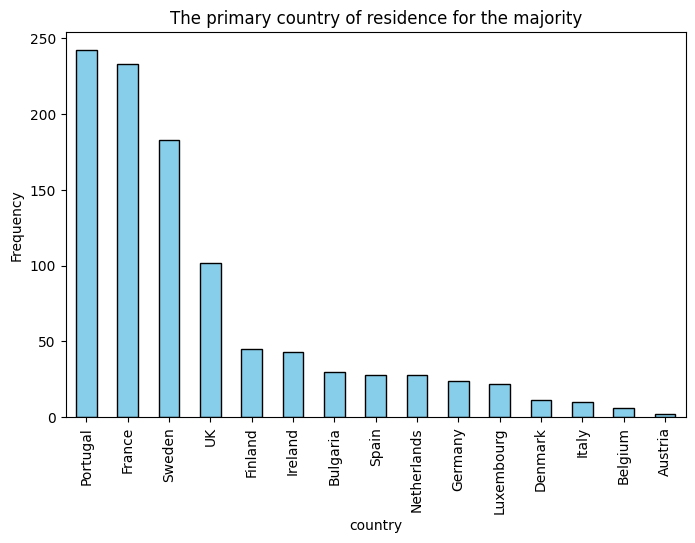

In [33]:
plt.figure(figsize=(8, 5))
country_analysis.plot(kind='bar', color='skyblue' , edgecolor='black' )
plt.title('The primary country of residence for the majority')
plt.xlabel('country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [34]:
productcat_analysis = concatenated_df['category'].value_counts()
productcat_analysis

category
Clothing       157
Games          140
Electronics    134
Appliances     133
Books          119
Beauty         116
Smartphones     95
Outdoors        50
Accessories     36
Other           29
Name: count, dtype: int64

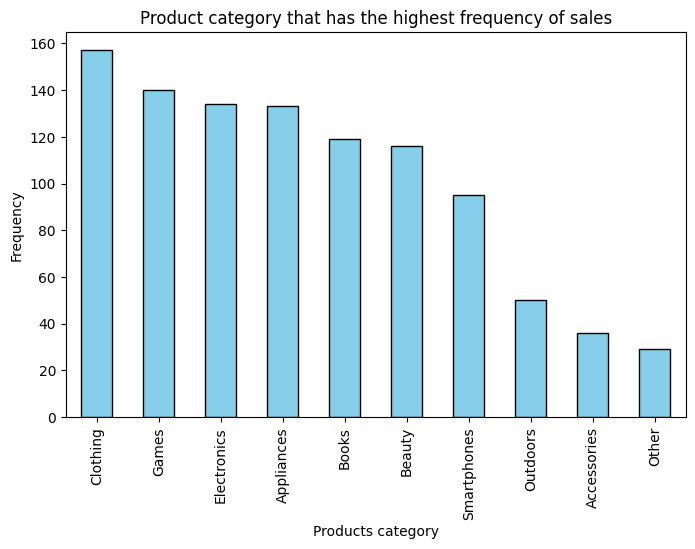

In [35]:
plt.figure(figsize=(8, 5))
productcat_analysis.plot(kind='bar', color='skyblue' , edgecolor='black' )
plt.title('Product category that has the highest frequency of sales')
plt.xlabel('Products category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [36]:
customers_analysis = concatenated_df['customer_name'].value_counts()
customers_analysis

customer_name
Johns and Sons                       143
Hessel-Stiedemann                     57
Swaniawski, Runolfsson and Green      25
Dickinson, Hyatt and Berge            24
Murray, Reichel and Nolan             23
                                    ... 
Baumbach Group                         2
Parisian, Steuber and Satterfield      2
Gorczany-Lehner                        1
Lind, Mueller and Stoltenberg          1
Littel-Blick                           1
Name: count, Length: 75, dtype: int64

In [37]:
salesman_analysis = concatenated_df['sales_manager'].value_counts()
salesman_analysis

sales_manager
Celine Tumasian     242
Othello Bowes       233
Maxie Marrow        183
Jessamine Apark     102
Hube Corey           45
Glenine Suttaby      43
Charil Alpe          30
Emalia Dinse         28
Denice Amberg        28
Rickard Doogood      24
Ilsa Kob             22
Modestia Byfford     11
Piggy Roscrigg       10
Lambert Norheny       6
Orsa Geekin           2
Name: count, dtype: int64

In [38]:
salesrep_analysis = concatenated_df['sales_rep'].value_counts()
salesrep_analysis

sales_rep
Amelina Piscopiello    56
Corene Shirer          53
Aurelie Wren           52
Hortense Gerring       52
Ora Grennan            50
Crysta Halls           47
Smitty Culverhouse     44
Avrit Chanders         43
Brynn Dempster         41
Madelon Bront          40
Alyosha Meah           40
Winny Agnolo           39
Tarrah Castelletti     38
Maighdiln Upcraft      37
Genevra Charrisson     37
Anita Woakes           36
Caro Morfield          29
Nero Harbisher         28
Jay Morefield          26
Wat Bowkley            24
Casie MacBain          24
Bunnie Tonbridge       23
Jocelyn Laurentino     22
Mellicent Mattys       21
Palm Wetherald         20
Bernadine Fullagar     15
Shermy McGready        15
Perri Aldersley        13
Joshua Prevost         10
Bertha Walbrook        10
Case Desorts            6
Collin Mackness         6
Manuel Goudie           5
Cobby Andersen          5
Bank Coumbe             2
Name: count, dtype: int64

In [39]:
devtype_analysis = concatenated_df['device_type'].value_counts()
devtype_analysis

device_type
PC        789
Mobile    145
Tablet     74
Name: count, dtype: int64

In [40]:
devtype_analysis.index

Index(['PC', 'Mobile', 'Tablet'], dtype='object', name='device_type')

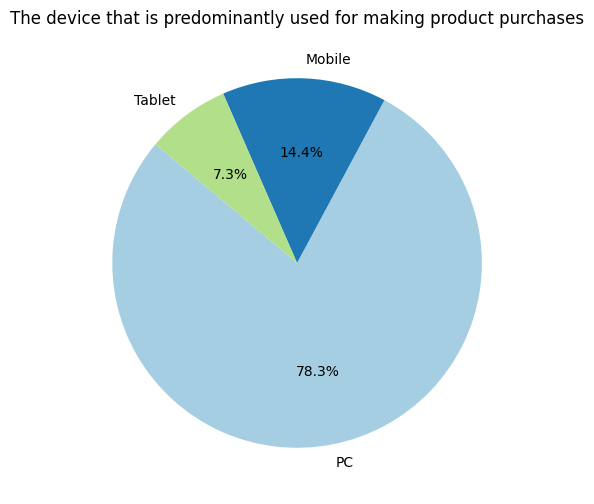

In [41]:
devtype_values = (devtype_analysis / devtype_analysis.sum()) * 100

# Plot the percentages in a pie chart
plt.figure(figsize=(6, 6))
plt.pie(devtype_values, labels=devtype_values.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('The device that is predominantly used for making product purchases')
plt.show()

In [42]:
numeric_variables = ['order_value_EUR', 'cost', 'refund']

# Display descriptive statistics for the specified numeric variables
descriptive_stats = concatenated_df[numeric_variables].describe()
descriptive_stats

,order_value_EUR,cost,refund
count,1009.000000,1009.000000,1009.000000
mean,113267.885208,94422.763518,49236.007929
std,61615.866535,51693.620772,28744.989463
min,15100.570000,12113.680000,1009.000000
25%,65760.390000,54635.770000,24597.000000
50%,105357.645000,86928.030000,48652.000000
75%,151012.120000,126080.020000,74664.000000
max,383996.760000,304701.430000,99539.000000


In [43]:
import seaborn as sns

In [44]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [45]:
import seaborn as sns

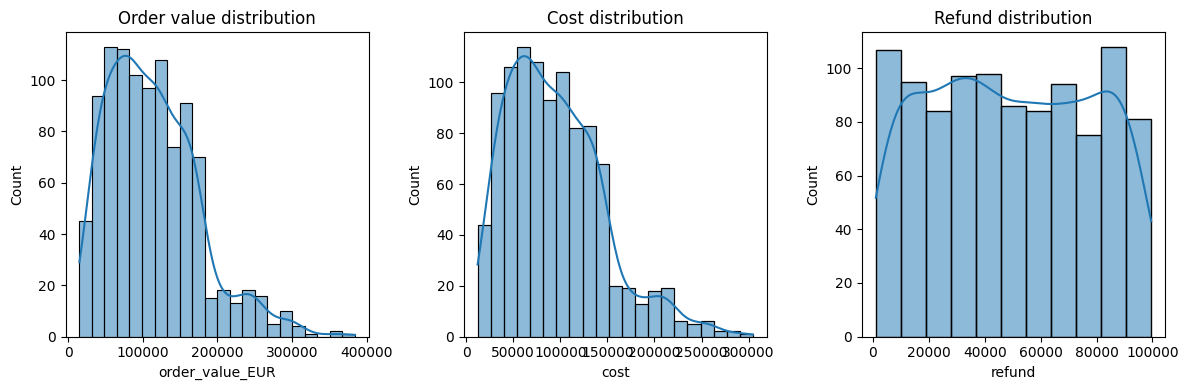

In [46]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.histplot(concatenated_df['order_value_EUR'], kde=True)
plt.title('Order value distribution')

plt.subplot(132)
sns.histplot(concatenated_df['cost'], kde=True)
plt.title('Cost distribution')

plt.subplot(133)
sns.histplot(concatenated_df['refund'], kde=True)
plt.title('Refund distribution')

plt.tight_layout()
plt.show()

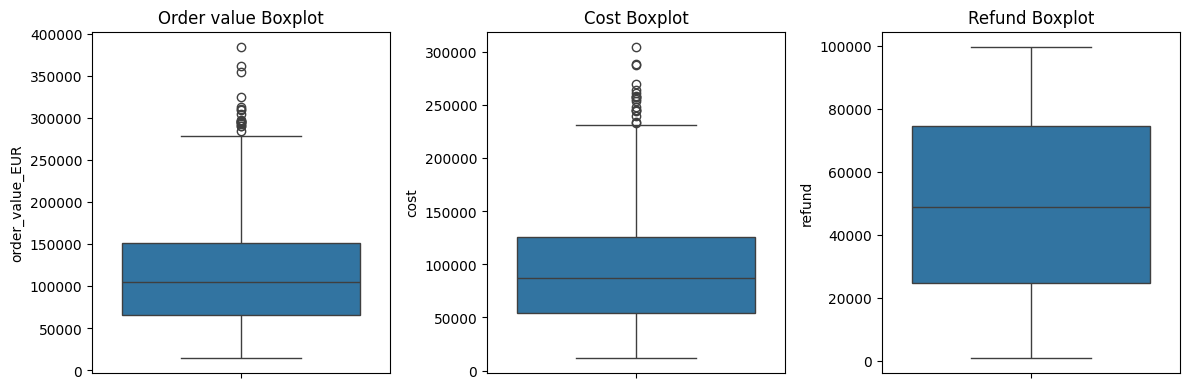

In [47]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.boxplot(data=concatenated_df['order_value_EUR'])
plt.title('Order value Boxplot')

plt.subplot(132)
sns.boxplot(data=concatenated_df['cost'])
plt.title('Cost Boxplot')

plt.subplot(133)
sns.boxplot(data=concatenated_df['refund'])
plt.title('Refund Boxplot')

plt.tight_layout()
plt.show()

In [48]:
median_order_value = concatenated_df.groupby('category')['order_value_EUR'].median()
median_order_value.sort_values(ascending = False)

category
Accessories    139619.740
Outdoors       111875.915
Smartphones    111639.290
Games          108125.365
Clothing       103726.570
Beauty         103345.925
Appliances     100978.490
Electronics     99809.630
Books           99518.860
Other           77087.840
Name: order_value_EUR, dtype: float64

In [49]:
median_cost = concatenated_df.groupby('category')['cost'].median()
median_cost.sort_values(ascending = False)

category
Accessories    116395.415
Smartphones     96566.370
Outdoors        94660.390
Games           92756.590
Clothing        86581.390
Beauty          86442.810
Books           84761.750
Appliances      84128.530
Electronics     83245.005
Other           65894.690
Name: cost, dtype: float64

In [50]:
median_customers = concatenated_df.groupby('customer_name')['order_value_EUR'].median()
median_customers.sort_values(ascending = False)

customer_name
Schuster Inc                     201573.230
Tromp LLC                        172340.860
Jacobson, Marvin and Brown       158011.300
O'Connell-Mitchell               156441.185
West-Cummings                    153823.740
                                    ...    
Rath-Schroeder                    69664.885
Homenick-Marvin                   57748.435
Lind, Mueller and Stoltenberg     57115.990
Lueilwitz, Kerluke and Lesch      54079.040
Gorczany-Lehner                   33724.530
Name: order_value_EUR, Length: 75, dtype: float64

In [51]:
median_customers_cost = concatenated_df.groupby('customer_name')['cost'].median()
median_customers_cost.sort_values(ascending = False)

customer_name
Schuster Inc                     163052.820
Jacobson, Marvin and Brown       137390.830
Tromp LLC                        136562.900
West-Cummings                    129258.090
O'Connell-Mitchell               129090.565
                                    ...    
Rath-Schroeder                    56826.990
Lind, Mueller and Stoltenberg     48976.960
Homenick-Marvin                   46504.600
Lueilwitz, Kerluke and Lesch      45031.620
Gorczany-Lehner                   26770.530
Name: cost, Length: 75, dtype: float64

In [52]:
median_sales_rep = concatenated_df.groupby('sales_rep')['refund'].median()
median_sales_rep.sort_values(ascending = False)

sales_rep
Mellicent Mattys       65788.0
Corene Shirer          65117.0
Jay Morefield          63302.5
Winny Agnolo           60180.0
Bernadine Fullagar     59556.0
Palm Wetherald         55253.5
Jocelyn Laurentino     54422.5
Hortense Gerring       54201.5
Joshua Prevost         53876.5
Amelina Piscopiello    51615.5
Madelon Bront          50451.5
Collin Mackness        49281.5
Anita Woakes           48598.0
Brynn Dempster         48333.0
Wat Bowkley            48265.0
Shermy McGready        48238.0
Nero Harbisher         47320.5
Maighdiln Upcraft      46850.0
Genevra Charrisson     46381.0
Bertha Walbrook        46047.5
Aurelie Wren           46036.0
Avrit Chanders         45035.0
Tarrah Castelletti     43647.5
Bank Coumbe            42433.0
Alyosha Meah           41807.5
Ora Grennan            40519.0
Casie MacBain          40373.5
Crysta Halls           39735.0
Smitty Culverhouse     39691.5
Bunnie Tonbridge       38062.0
Caro Morfield          37786.0
Perri Aldersley        37358.

In [53]:
pivot_table = df.pivot_table(index='customer_name',
                             values=['order_value_EUR', 'cost'],
                             aggfunc={'order_value_EUR': 'median', 'cost': 'median', 'customer_name': 'count'})

pivot_table = pivot_table.rename(columns={'order_value_EUR': 'Median_Sales',
                                          'cost': 'Median_Cost',
                                          'customer_name': 'Count'}) 
sorted_pivot_table = pivot_table.sort_values(by = 'Count', ascending = False)
top_10 = sorted_pivot_table[0:10]
top_10

,Median_Cost,Count,Median_Sales
customer_name,,,
Johns and Sons,86679.665,142,105900.99
Hessel-Stiedemann,80342.700,55,98322.98
"Swaniawski, Runolfsson and Green",84690.350,25,100094.97
"Dickinson, Hyatt and Berge",85886.100,24,104540.68
"Murray, Reichel and Nolan",71501.100,23,88832.28
"Rowe, Hermiston and Kessler",66065.680,22,77690.89
Kihn Inc,66742.150,22,80450.08
Tillman and Sons,75839.400,21,91350.76
Wisoky Inc,94336.180,21,115226.80


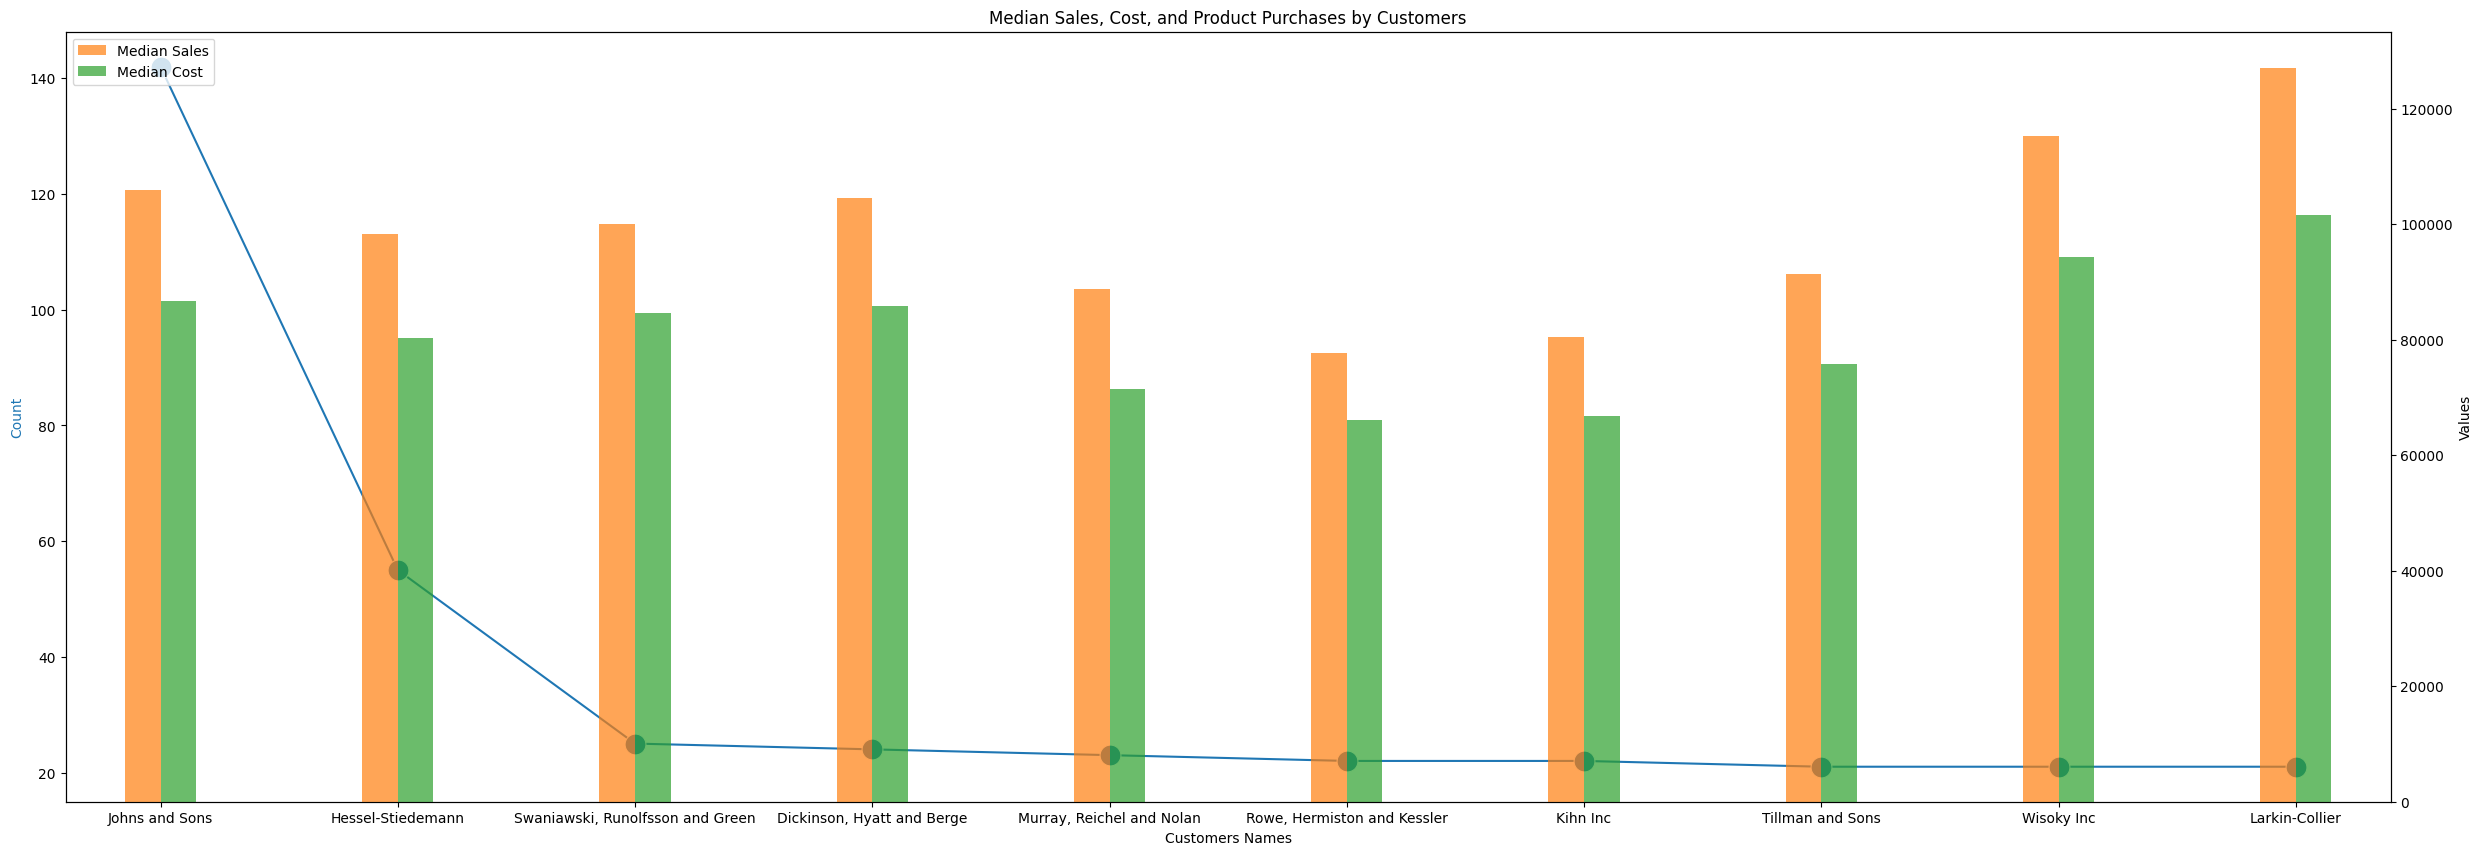

In [54]:
fig, ax1 = plt.subplots(figsize=(30, 10))

ms = 15
sns.lineplot(data=top_10['Count'], marker='o', ax=ax1, color='tab:blue', markersize=ms)
ax1.set_xlabel('Customers Names')
ax1.set_ylabel('Count', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()

bar_plot = top_10[['Median_Sales', 'Median_Cost']].plot(kind='bar', ax=ax2, width=0.3, color=['tab:orange', 'tab:green'], alpha=0.7)
ax2.set_ylabel('Values', color='black')
ax2.tick_params(axis='y', labelcolor='black')
bar_plot.set_xticklabels(top_10.index, rotation=90, ha='center')
                                                  
plt.title('Median Sales, Cost, and Product Purchases by Customers')
ax2.legend(loc='upper left', labels=['Median Sales', 'Median Cost'])                                                  

plt.show()

In [55]:
cross_tab = pd.crosstab(concatenated_df['sales_manager'], df['category'])
cross_tab

category,Accessories,Appliances,Beauty,Books,Clothing,Electronics,Games,Other,Outdoors,Smartphones
sales_manager,,,,,,,,,,
Celine Tumasian,5,30,26,18,42,30,41,6,14,26
Charil Alpe,1,5,3,2,3,8,5,0,2,1
Denice Amberg,0,1,4,1,6,5,1,2,2,6
Emalia Dinse,1,6,3,5,3,3,1,2,0,2
Glenine Suttaby,4,3,2,6,8,5,4,1,4,6
Hube Corey,0,4,9,6,6,6,8,0,2,3
Ilsa Kob,0,2,3,7,3,3,1,1,0,2
Jessamine Apark,4,14,11,13,19,11,10,3,4,11
Lambert Norheny,0,3,0,0,0,3,0,0,0,0


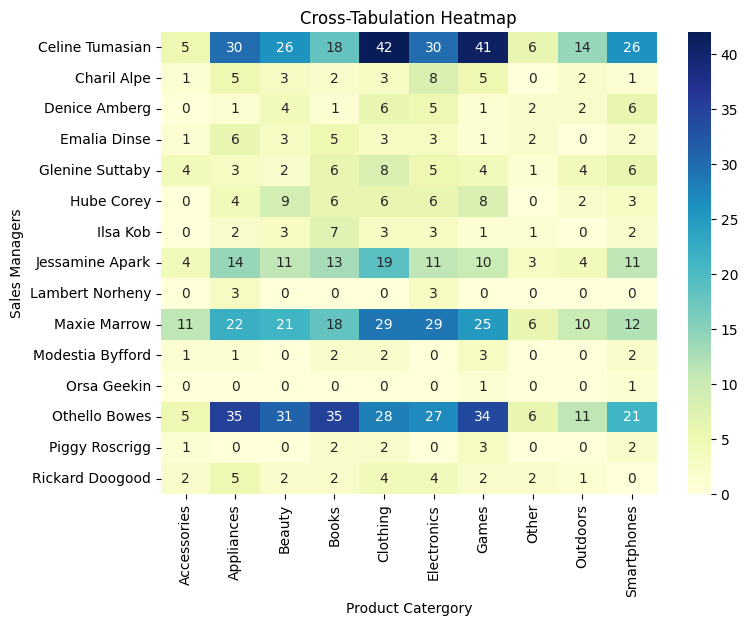

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title('Cross-Tabulation Heatmap')
plt.xlabel('Product Catergory')
plt.ylabel('Sales Managers')
plt.show()

In [57]:
cross_tab_sales_rep = pd.crosstab(concatenated_df['sales_rep'], df['country'])
cross_tab_sales_rep

country,Austria,Belgium,Bulgaria,Denmark,Finland,France,Germany,Ireland,Italy,Luxembourg,Netherlands,Portugal,Spain,Sweden,UK
sales_rep,,,,,,,,,,,,,,,
Alyosha Meah,0,0,0,0,4,10,0,2,0,2,0,8,1,8,5
Amelina Piscopiello,0,0,1,1,0,11,1,3,1,1,0,11,3,14,9
Anita Woakes,0,1,1,0,4,6,0,2,1,0,1,5,0,9,6
Aurelie Wren,0,0,2,0,5,10,3,3,0,0,1,12,3,7,5
Avrit Chanders,0,0,3,1,0,10,0,3,0,0,2,15,1,8,0
Bank Coumbe,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
Bernadine Fullagar,0,0,1,0,2,3,2,0,0,1,0,1,0,3,2
Bertha Walbrook,0,0,1,0,0,2,0,1,0,0,0,2,1,2,0
Brynn Dempster,0,0,1,0,3,4,2,1,0,2,0,16,1,8,3


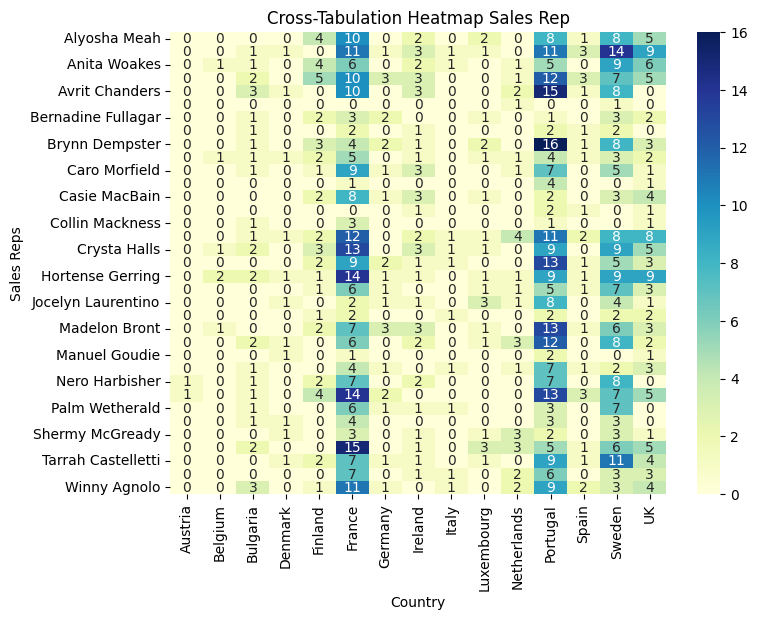

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_sales_rep, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title('Cross-Tabulation Heatmap Sales Rep')
plt.xlabel('Country')
plt.ylabel('Sales Reps')
plt.show()

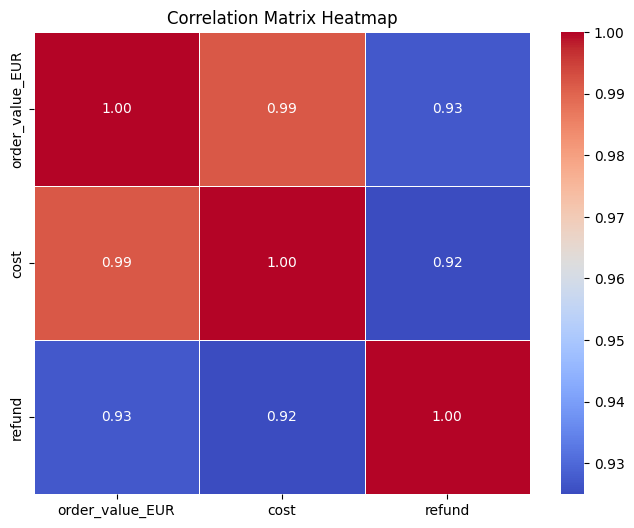

In [59]:
correlation_matrix = concatenated_df[['order_value_EUR', 'cost', 'refund']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [60]:
#Data Transformation Techniques

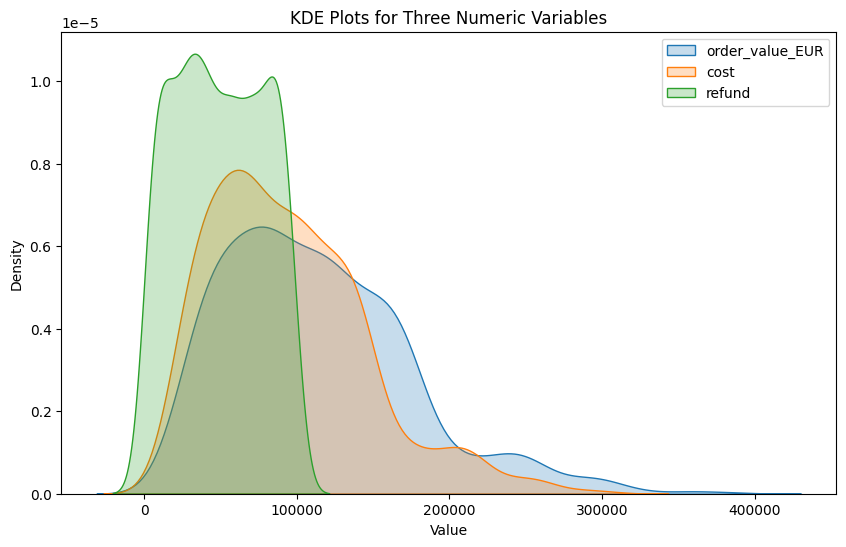

In [61]:
numeric_variables = ['order_value_EUR', 'cost', 'refund']

# Create a single figure for all KDE plots
plt.figure(figsize=(10, 6))

# Plot KDE plots for each numeric variable
for var in numeric_variables:
    sns.kdeplot(concatenated_df[var], fill=True, label=var)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE Plots for Three Numeric Variables')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [62]:
duplicates = df[df.duplicated()]

# Print duplicate rows
print("Duplicate Rows:")
duplicates

Duplicate Rows:


,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
23,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546


In [63]:
df_no_duplicates = df.drop_duplicates()

# Print the DataFrame without duplicates
print("DataFrame without Duplicates:")
df_no_duplicates

DataFrame without Duplicates:


,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546
...,...,...,...,...,...,...,...,...,...,...
996,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531
997,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807
998,France,124784.67,106853.11,2020-05-22,Electronics,"Swaniawski, Runolfsson and Green",Othello Bowes,Ora Grennan,Tablet,44-2757396
999,Germany,61968.26,50690.04,2020-12-27,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031


In [64]:
cleaned_data = df_no_duplicates

In [65]:
missing_values = df.isnull().sum()

# To check for missing values in a specific column, you can use:
# missing_values = df['column_name'].isnull().sum()

# Print the columns with missing values and their respective counts
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Series([], dtype: int64)


In [66]:
from sklearn.impute import SimpleImputer

target_column = 'order_value_EUR'

# Create a SimpleImputer instance to impute missing values with a strategy (e.g., 'mean', 'median', 'most_frequent')
# Other strategies include 'constant' to replace missing values with a constant value
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the selected column and transform it to impute missing values
df[target_column] = imputer.fit_transform(df[[target_column]])

In [67]:
df.isnull().sum()

country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        0
order_id           0
dtype: int64

In [68]:
excel_file = 'Extra Variable.xlsx'

# Load Excel data into a pandas DataFrame
extra_vars = pd.read_excel(excel_file)

# Now, you can work with the data in the 'df' DataFrame
# For example, you can print the first few rows of the DataFrame
extra_vars.head()

,order_id,refund
0,70-0511466,43621
1,77-3489084,13385
2,65-8218141,69535
3,29-5478106,90064
4,57-6602854,61736


In [69]:
merged_df = cleaned_data.merge(extra_vars, on='order_id')
merged_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176


In [70]:
# Replace 'your_excel_file.xlsx' with the path to your Excel file
excel_file = 'Extra Data.xlsx'

# Load Excel data into a pandas DataFrame
extra_data = pd.read_excel(excel_file)

# Now, you can work with the data in the 'df' DataFrame
# For example, you can print the first few rows of the DataFrame
extra_data.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,17524.02,14122.61,2020-12-02 00:00:00,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466,7964
1,France,64827.80,56043.63,1/20/2019,Appliances,Gislason-Stanton,Othello Bowes,Maighdiln Upcraft,PC,62-3312495,4974
2,Portugal,71620.08,62245.01,2019-05-02 00:00:00,Books,Schoen-Keeling,Celine Tumasian,Smitty Culverhouse,NaN,69-6259390,2809
3,Portugal,74532.02,59752.32,2020-02-04 00:00:00,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183,4260
4,Portugal,78461.13,63537.82,2020-10-05 00:00:00,Appliances,Hessel-Stiedemann,Celine Tumasian,Smitty Culverhouse,Mobile,91-4126746,6038


In [71]:
final_df = pd.concat([merged_df, extra_data], ignore_index=True)
final_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23 00:00:00,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15 00:00:00,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26 00:00:00,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22 00:00:00,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176
...,...,...,...,...,...,...,...,...,...,...,...
1004,Spain,84900.24,73701.90,7/14/2020,Clothing,"Farrell, Swaniawski and Crist",Emalia Dinse,Perri Aldersley,PC,60-6998932,7598
1005,Finland,116563.40,92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,2928
1006,UK,156585.22,126599.15,8/30/2020,Accessories,"Hermiston, Simonis and Wisoky",Jessamine Apark,Winny Agnolo,PC,64-5761908,9376
1007,Spain,178763.42,146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,5153


In [72]:
#square root transformation

In [73]:
import numpy as np

transformed_orderval = np.sqrt(final_df['order_value_EUR'])

<Axes: xlabel='order_value_EUR', ylabel='Density'>

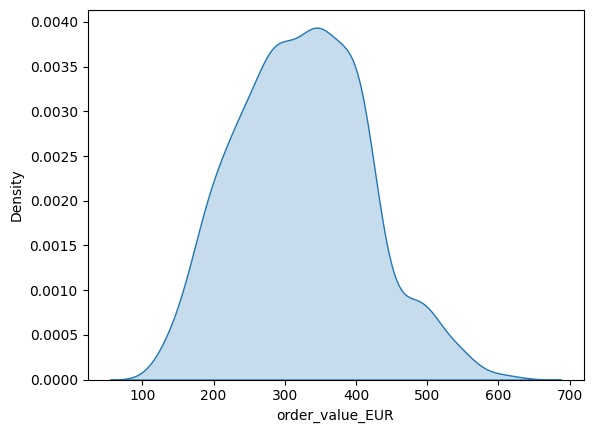

In [74]:
sns.kdeplot(transformed_orderval, fill=True)

In [75]:
transformed_cost = np.sqrt(final_df['cost'])

<Axes: xlabel='cost', ylabel='Density'>

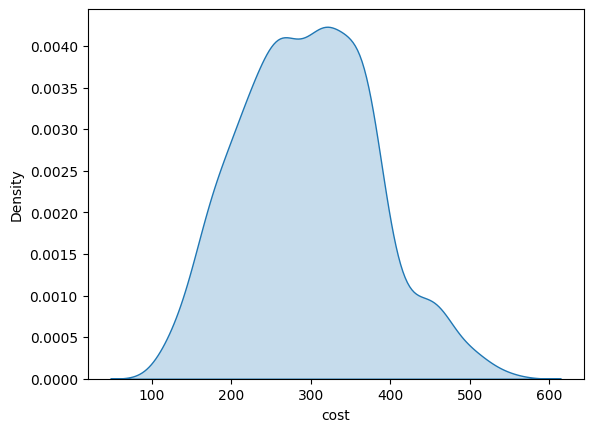

In [76]:
sns.kdeplot(transformed_cost, fill=True)

In [77]:
transformed_refund = np.sqrt(final_df['refund'])

<Axes: xlabel='refund', ylabel='Density'>

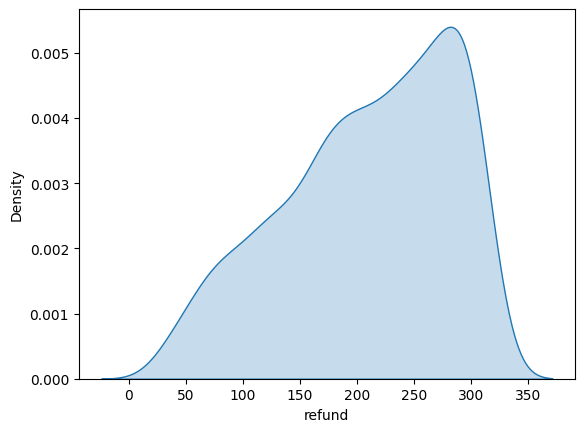

In [78]:
sns.kdeplot(transformed_refund, fill=True)

In [79]:
#Logarithm data transformation

In [80]:
log_orderval = np.log(final_df['order_value_EUR'])

<Axes: xlabel='order_value_EUR', ylabel='Density'>

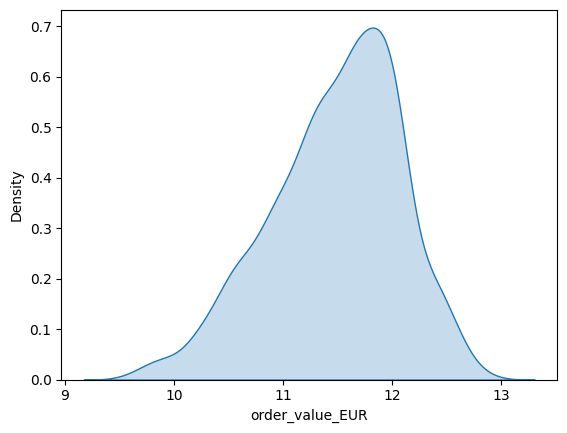

In [81]:
sns.kdeplot(log_orderval, fill=True)

<Axes: xlabel='cost', ylabel='Density'>

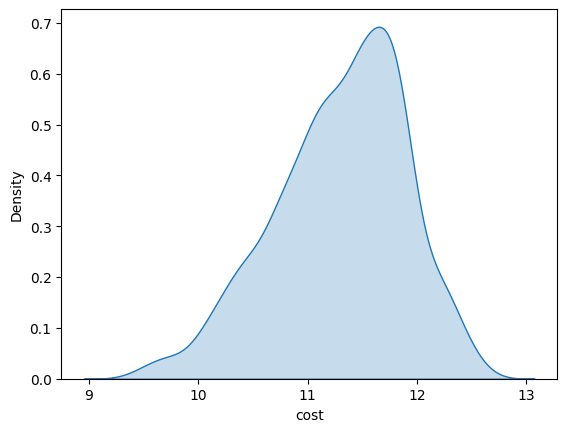

In [82]:
log_cost = np.log(final_df['cost'])

sns.kdeplot(log_cost, fill=True)

<Axes: xlabel='refund', ylabel='Density'>

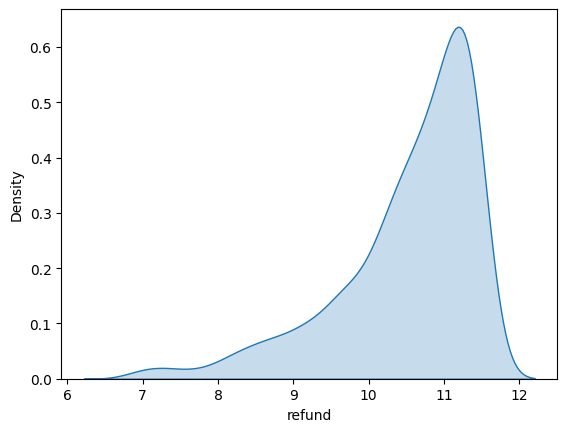

In [83]:
log_refund = np.log(final_df['refund'])

sns.kdeplot(log_refund, fill=True)

In [84]:
#Box-cox transformation

In [85]:
from scipy import stats

<Axes: xlabel='order_value_EUR', ylabel='Density'>

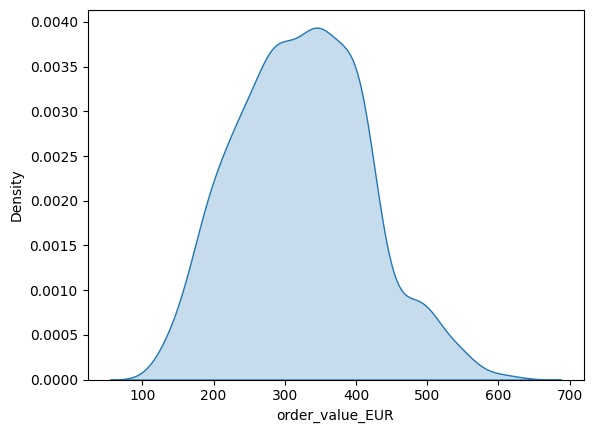

In [86]:
boxcox_orderval = np.sqrt(final_df['order_value_EUR'])

sns.kdeplot(boxcox_orderval, fill=True)

<Axes: ylabel='Density'>

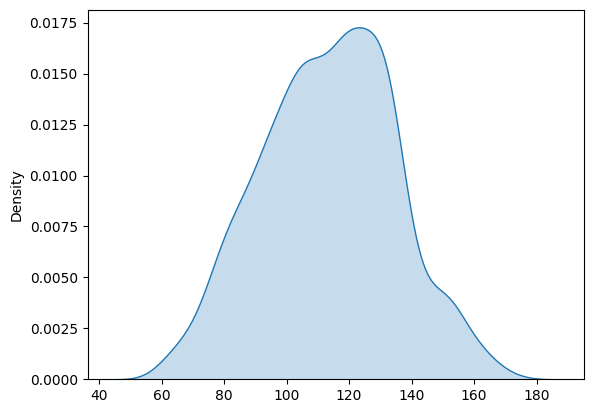

In [87]:
boxcox_cost, lambda_value = stats.boxcox(final_df['cost'])

sns.kdeplot(boxcox_cost, fill=True)

<Axes: ylabel='Density'>

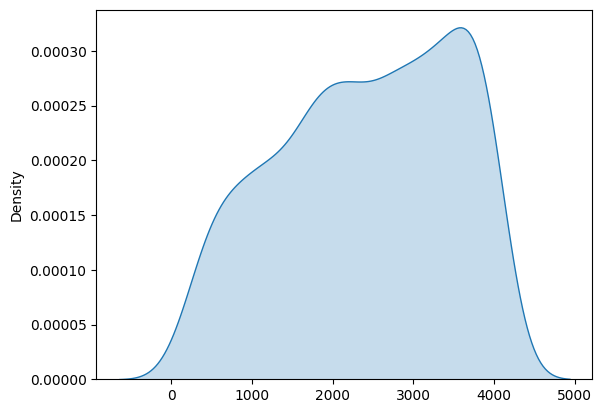

In [88]:
boxcox_refund, lambda_value = stats.boxcox(final_df['refund'])

sns.kdeplot(boxcox_refund, fill=True)

In [89]:
#Yeo-Johnson 

In [90]:
import seaborn as sns
from scipy.stats import boxcox
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [91]:
from scipy.stats import yeojohnson

In [92]:
if (final_df['order_value_EUR'] <= 0).any():
    raise ValueError("The 'order_value_EUR' column contains non-positive values.")

<Axes: ylabel='Density'>

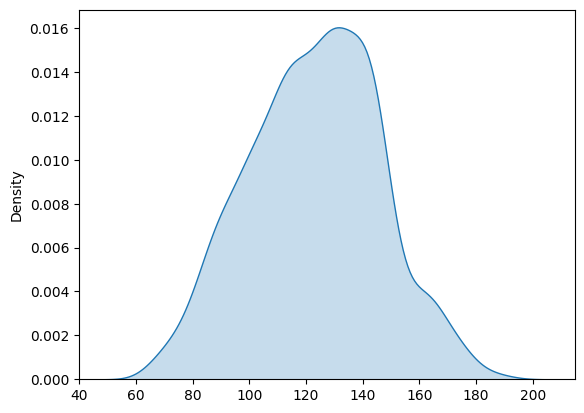

In [93]:
yeo_orderval, lambda_value = stats.yeojohnson(final_df['order_value_EUR'])
sns.kdeplot(yeo_orderval, fill=True)

<Axes: ylabel='Density'>

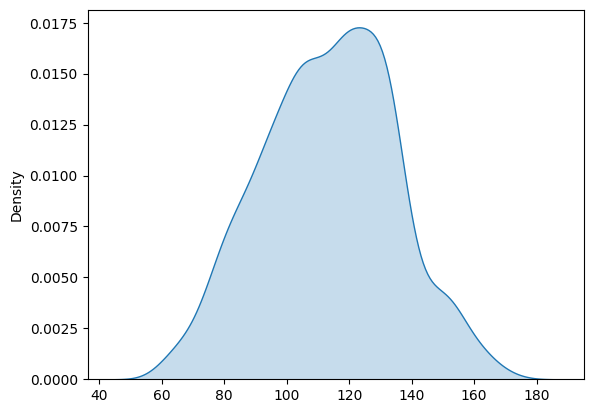

In [94]:
yeo_cost, lambda_value = yeojohnson(final_df['cost'])

sns.kdeplot(yeo_cost, fill=True)

<Axes: ylabel='Density'>

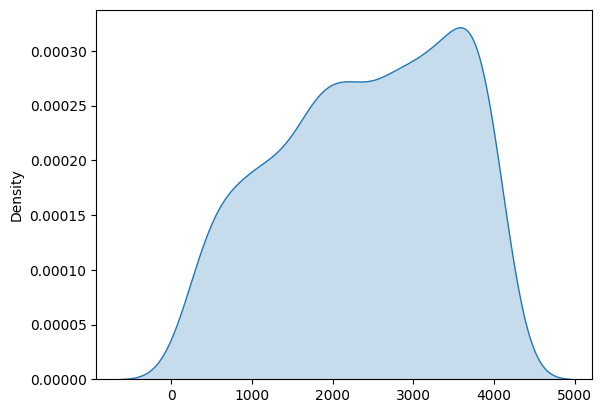

In [95]:
yeo_refund, lambda_value = yeojohnson(final_df['refund'])

sns.kdeplot(yeo_refund, fill=True)

In [96]:
#ANOVA Test

In [97]:
final_df['yeo_cost'] = yeo_cost

In [98]:
final_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund,yeo_cost
0,Sweden,98320.37,77722.25,2020-08-23 00:00:00,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621,110.082724
1,France,46296.26,40319.41,2020-05-15 00:00:00,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385,88.735444
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535,125.373080
3,France,203604.46,175344.16,2019-06-26 00:00:00,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064,143.554950
4,UK,63979.04,56032.84,2019-10-22 00:00:00,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176,98.882944


In [99]:
from scipy.stats import f_oneway

In [100]:
PC_data = final_df[final_df['device_type'] == 'PC']
Tab_data = final_df[final_df['device_type'] == 'Tablet']
Mob_data = final_df[final_df['device_type'] == 'Mobile']

In [101]:
anova_result = f_oneway(PC_data['yeo_cost'], Tab_data['yeo_cost'], Mob_data['yeo_cost'])

# Display the ANOVA result
print("One-Way ANOVA Result:")
print(anova_result)

# Extract and display p-value
p_value = anova_result.pvalue
print(f'p-value: {p_value}')

# Interpret the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between groups.")

One-Way ANOVA Result:
F_onewayResult(statistic=1.1378864516922056, pvalue=0.32090824126771583)
p-value: 0.32090824126771583
Fail to reject the null hypothesis. There are no significant differences between groups.


In [102]:
#Pearson Test

In [103]:
from scipy.stats import pearsonr

In [104]:
import numpy as np
from scipy import stats

# Assuming boxcox_orderval and yeo_cost are NumPy arrays
# Replace 'your_missing_value' with the actual value indicating missing values in your dataset

# Identify and handle missing values
valid_indices_bc = ~np.isnan(boxcox_orderval)
valid_indices_yeo = ~np.isnan(yeo_cost)

# Ensure both arrays have the same length
common_indices = np.intersect1d(np.where(valid_indices_bc)[0], np.where(valid_indices_yeo)[0])
min_length = min(len(common_indices), len(yeo_cost))

boxcox_orderval = boxcox_orderval[common_indices[:min_length]]
yeo_cost = yeo_cost[common_indices[:min_length]]

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(boxcox_orderval, yeo_cost)

print("Correlation between boxcox_orderval and yeo_cost:", correlation)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Correlation is statistically significant.")
else:
    print("Correlation is not statistically significant.")

Correlation between boxcox_orderval and yeo_cost: 0.9901235089396759
P-value: 0.0
Correlation is statistically significant.


In [105]:
import numpy as np
from scipy import stats

# Assuming boxcox_orderval, yeo_cost, and final_df['refund'] are NumPy arrays
# Replace 'your_missing_value' with the actual value indicating missing values in your dataset

# Identify and handle missing values
valid_indices_bc = ~np.isnan(boxcox_orderval)
valid_indices_yeo = ~np.isnan(yeo_cost)
valid_indices_refund = ~np.isnan(final_df['refund'])

# Ensure all arrays have the same length
common_indices = np.intersect1d(np.intersect1d(np.where(valid_indices_bc)[0], np.where(valid_indices_yeo)[0]), np.where(valid_indices_refund)[0])
min_length = min(len(common_indices), len(yeo_cost), len(final_df['refund']))

boxcox_orderval = boxcox_orderval[common_indices[:min_length]]
yeo_cost = yeo_cost[common_indices[:min_length]]
refund = final_df['refund'][common_indices[:min_length]]

# Perform Pearson correlation tests
correlation1, p_value1 = stats.pearsonr(boxcox_orderval, yeo_cost)
correlation2, p_value2 = stats.pearsonr(boxcox_orderval, refund)
correlation3, p_value3 = stats.pearsonr(refund, yeo_cost)

print("Correlation between order value and cost:", correlation1)
print("P-value:", p_value1)
print("Correlation between order value and refund:", correlation2)
print("P-value:", p_value2)
print("Correlation between cost and refund:", correlation3)
print("P-value:", p_value3)

alpha = 0.05
if p_value1 < alpha:
    print("Correlation between order value and cost is statistically significant.")
else:
    print("Correlation between order value and cost is not statistically significant.")

if p_value2 < alpha:
    print("Correlation between order value and refund is statistically significant.")
else:
    print("Correlation between order value and refund is not statistically significant.")

if p_value3 < alpha:
    print("Correlation between cost and refund is statistically significant.")
else:
    print("Correlation between cost and refund is not statistically significant.")

Correlation between order value and cost: 0.9901235089396759
P-value: 0.0
Correlation between order value and refund: 0.9577280584499328
P-value: 0.0
Correlation between cost and refund: 0.9535863737842777
P-value: 0.0
Correlation between order value and cost is statistically significant.
Correlation between order value and refund is statistically significant.
Correlation between cost and refund is statistically significant.


In [106]:
# Regression Test

In [107]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [108]:
import statsmodels.api as sm

X = sm.add_constant(np.column_stack((boxcox_orderval, yeo_cost)))

model = sm.OLS(final_df['refund'], X).fit()

coefficients = model.params

print("Regression Coefficients:")
print("Intercept:", coefficients[0])
print("Order Value Coefficients:", coefficients[1])
print("Cost Coefficients:", coefficients[2])

print("\nRegression Summary:")
print(model.summary())

Regression Coefficients:
Intercept: -62901.57413348657
Order Value Coefficients: 218.37285383262352
Cost Coefficients: 365.0879663806364

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 refund   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     5683.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:58:59   Log-Likelihood:                -10524.
No. Observations:                1009   AIC:                         2.105e+04
Df Residuals:                    1006   BIC:                         2.107e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|

/var/folders/4m/j4x3r2r53pqf8f73n3dhtt9c0000gp/T/ipykernel_832/1778729320.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", coefficients[0])
/var/folders/4m/j4x3r2r53pqf8f73n3dhtt9c0000gp/T/ipykernel_832/1778729320.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Order Value Coefficients:", coefficients[1])
/var/folders/4m/j4x3r2r53pqf8f73n3dhtt9c0000gp/T/ipykernel_832/1778729320.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value b

In [109]:
#Feature Engineering to Generate Significant Variables 

In [110]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [111]:
top_10.index

Index(['Johns and Sons', 'Hessel-Stiedemann',
       'Swaniawski, Runolfsson and Green', 'Dickinson, Hyatt and Berge',
       'Murray, Reichel and Nolan', 'Rowe, Hermiston and Kessler', 'Kihn Inc',
       'Tillman and Sons', 'Wisoky Inc', 'Larkin-Collier'],
      dtype='object', name='customer_name')

In [112]:
loyal_customers = ['Johns and Sons', 'Hessel-Stiedemann', 'Swaniawski, Runolfsson and Green',
                   'Dickinson, Hyatt and Berge', 'Murray, Reichel and Nolan', 'Rowe, Hermiston and Kessler',
                   'Kihn Inc', 'Tillman and Sons', 'Wisoky Inc', 'Larkin-Collier']

# Function to assign customer type
def assign_customer_type(customer_name):
    if customer_name in loyal_customers:
        return 'loyal customer'
    else:
        return 'regular customer'

# Apply the function to create a new column 'customer_type'
final_df['customer_type'] = final_df['customer_name'].apply(assign_customer_type)

In [113]:
final_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund,yeo_cost,customer_type
0,Sweden,98320.37,77722.25,2020-08-23 00:00:00,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621,110.082724,regular customer
1,France,46296.26,40319.41,2020-05-15 00:00:00,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385,88.735444,loyal customer
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535,125.373080,regular customer
3,France,203604.46,175344.16,2019-06-26 00:00:00,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064,143.554950,regular customer
4,UK,63979.04,56032.84,2019-10-22 00:00:00,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176,98.882944,regular customer


In [114]:
final_df['customer_type'].value_counts()

customer_type
regular customer    629
loyal customer      380
Name: count, dtype: int64

In [115]:
final_df['date'] = pd.to_datetime(final_df['date'])

# Extract day, month, and year into separate columns
final_df['day'] = final_df['date'].dt.day
final_df['month'] = final_df['date'].dt.month
final_df['year'] = final_df['date'].dt.year

In [116]:
final_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund,yeo_cost,customer_type,day,month,year
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621,110.082724,regular customer,23,8,2020
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385,88.735444,loyal customer,15,5,2020
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535,125.373080,regular customer,9,4,2020
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064,143.554950,regular customer,26,6,2019
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176,98.882944,regular customer,22,10,2019


In [117]:
final_df['year'].value_counts()

year
2020    515
2019    494
Name: count, dtype: int64

In [118]:
# Feature encoding to assign numeric values
# this is how you can assign numeric values to the values of a categorical variable

In [119]:
final_df['customer_type_encoded'] = final_df['customer_type'].apply(lambda x: 1 if x == 'loyal customer' else 0)

In [120]:
final_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund,yeo_cost,customer_type,day,month,year,customer_type_encoded
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621,110.082724,regular customer,23,8,2020,0
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385,88.735444,loyal customer,15,5,2020,1
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535,125.373080,regular customer,9,4,2020,0
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064,143.554950,regular customer,26,6,2019,0
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176,98.882944,regular customer,22,10,2019,0


In [121]:
#Techniques to create dummy variables
#Following this way, all the unique values are assigned as a variable name. I this case Fasle = not used and True = used.

In [122]:
prep_df = pd.get_dummies(final_df, columns=['country', 'device_type', 'category'])

In [123]:
prep_df.head()

,order_value_EUR,cost,date,customer_name,sales_manager,sales_rep,order_id,refund,yeo_cost,customer_type,...,category_Accessories,category_Appliances,category_Beauty,category_Books,category_Clothing,category_Electronics,category_Games,category_Other,category_Outdoors,category_Smartphones
0,98320.37,77722.25,2020-08-23,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,70-0511466,43621,110.082724,regular customer,...,False,False,False,False,False,False,True,False,False,False
1,46296.26,40319.41,2020-05-15,Wisoky Inc,Othello Bowes,Amelina Piscopiello,77-3489084,13385,88.735444,loyal customer,...,False,False,False,False,False,False,True,False,False,False
2,140337.34,115708.14,2020-04-09,Hegmann Group,Celine Tumasian,Corene Shirer,65-8218141,69535,125.373080,regular customer,...,False,True,False,False,False,False,False,False,False,False
3,203604.46,175344.16,2019-06-26,Kirlin and Sons,Othello Bowes,Crysta Halls,29-5478106,90064,143.554950,regular customer,...,False,False,False,False,False,True,False,False,False,False
4,63979.04,56032.84,2019-10-22,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,27-3437546,24176,98.882944,regular customer,...,False,False,False,False,False,False,True,False,False,False


In [124]:
#Feature scaling for standardization and normalization

In [125]:
#first filter out the dependent variable refund and the independent variables within two particular variable

In [126]:
y = prep_df['refund']

In [127]:
y

0       43621
1       13385
2       69535
3       90064
4       24176
        ...  
1004     7598
1005     2928
1006     9376
1007     5153
1008     3955
Name: refund, Length: 1009, dtype: int64

In [128]:
prep_df.columns

Index(['order_value_EUR', 'cost', 'date', 'customer_name', 'sales_manager',
       'sales_rep', 'order_id', 'refund', 'yeo_cost', 'customer_type', 'day',
       'month', 'year', 'customer_type_encoded', 'country_Austria',
       'country_Belgium', 'country_Bulgaria', 'country_Denmark',
       'country_Finland', 'country_France', 'country_Germany',
       'country_Ireland', 'country_Italy', 'country_Luxembourg',
       'country_Netherlands', 'country_Portugal', 'country_Spain',
       'country_Sweden', 'country_UK', 'device_type_Mobile', 'device_type_PC',
       'device_type_Tablet', 'category_Accessories', 'category_Appliances',
       'category_Beauty', 'category_Books', 'category_Clothing',
       'category_Electronics', 'category_Games', 'category_Other',
       'category_Outdoors', 'category_Smartphones'],
      dtype='object')

In [129]:
x = prep_df.drop(['date', 'customer_name', 'sales_manager', 'sales_rep', 'order_id', 'refund', 'customer_type'], axis=1)

In [130]:
x

,order_value_EUR,cost,yeo_cost,day,month,year,customer_type_encoded,country_Austria,country_Belgium,country_Bulgaria,...,category_Accessories,category_Appliances,category_Beauty,category_Books,category_Clothing,category_Electronics,category_Games,category_Other,category_Outdoors,category_Smartphones
0,98320.37,77722.25,110.082724,23,8,2020,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,46296.26,40319.41,88.735444,15,5,2020,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,140337.34,115708.14,125.373080,9,4,2020,0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,203604.46,175344.16,143.554950,26,6,2019,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,63979.04,56032.84,98.882944,22,10,2019,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,84900.24,73701.90,108.184498,14,7,2020,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1005,116563.40,92807.78,116.660214,26,9,2019,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1006,156585.22,126599.15,129.106322,30,8,2020,0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1007,178763.42,146621.76,135.434380,22,12,2019,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [131]:
x.columns

Index(['order_value_EUR', 'cost', 'yeo_cost', 'day', 'month', 'year',
       'customer_type_encoded', 'country_Austria', 'country_Belgium',
       'country_Bulgaria', 'country_Denmark', 'country_Finland',
       'country_France', 'country_Germany', 'country_Ireland', 'country_Italy',
       'country_Luxembourg', 'country_Netherlands', 'country_Portugal',
       'country_Spain', 'country_Sweden', 'country_UK', 'device_type_Mobile',
       'device_type_PC', 'device_type_Tablet', 'category_Accessories',
       'category_Appliances', 'category_Beauty', 'category_Books',
       'category_Clothing', 'category_Electronics', 'category_Games',
       'category_Other', 'category_Outdoors', 'category_Smartphones'],
      dtype='object')

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(x)

In [134]:
scaled_data

array([[-0.24271229, -0.32322742, -0.15141136, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [-1.08746076, -1.0471347 , -1.15414163, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [ 0.43954391,  0.41196441,  0.5668114 , ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       ...,
       [ 0.70337104,  0.62275272,  0.74217024, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [ 1.06349254,  1.01027712,  1.03941351, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [ 2.97826913,  3.15587176,  2.31728449, ..., -0.17202278,
        -0.22833669, -0.3223953 ]])

In [135]:
#values in the particular data frame is scaled.And providing us these values which are in a similar magnitude format.

In [136]:
#Splitting data into training and testing set

In [137]:
#You need to measure the accuracy of your machine learning model to define how much accurately your model is predicting, and to do so, 
#you have to have a train data and a test data.

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
train_x, test_x, train_y, test_y = train_test_split(scaled_data, y, test_size=0.25, random_state=42)

In [140]:
train_x

array([[-1.229965  , -1.19302984, -1.42931423, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [-1.44067055, -1.45022347, -2.04550632, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [-0.95512014, -0.95675515, -1.00093471, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       ...,
       [-1.12282243, -1.08717244, -1.22589549, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [-0.12817088, -0.08987659,  0.09842564, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [-0.52850975, -0.5806413 , -0.45985216, ..., -0.17202278,
        -0.22833669, -0.3223953 ]])

In [141]:
test_x

array([[-1.10425729, -1.09558132, -1.24129986, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [-0.5265562 , -0.59004809, -0.47191515, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [-1.17787158, -1.13712425, -1.31922715, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       ...,
       [-0.55133304, -0.60204604, -0.48739201, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [ 0.03931675,  0.07170466,  0.25828584, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [ 0.14406118,  0.17925673,  0.35961443, ..., -0.17202278,
        -0.22833669,  3.10178217]])

In [142]:
#Getting started: Linear regression ML model

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

Mean Absolute Percentage Error (MAPE): 0.3105931446757367


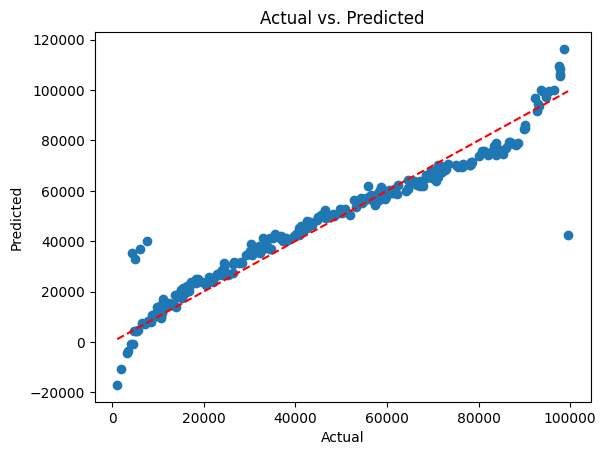

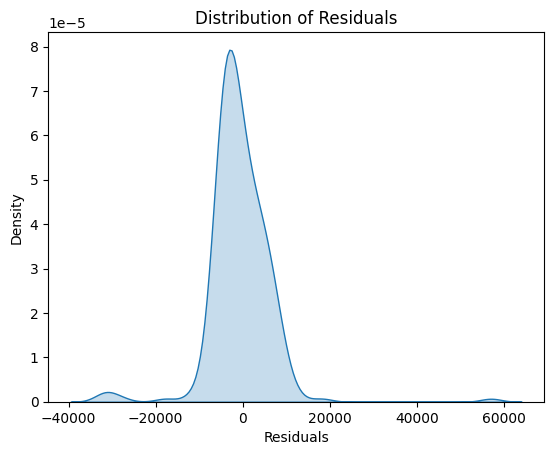

In [144]:
# Assuming you have already split your data into train and test sets: train_X, test_X, train_y, test_y

# Build a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(train_x, train_y)

# Make predictions on the test data
y_pred = model.predict(test_x)

# Measure accuracy with MAPE
mape = mean_absolute_percentage_error(test_y, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Visualize y_pred against test_y
plt.scatter(test_y, y_pred)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Visualize the distribution of residuals
residuals = test_y - y_pred
sns.kdeplot(residuals, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

In [145]:
#Decision Tree regressior ML model

In [146]:
from sklearn.tree import DecisionTreeRegressor

In [147]:
model_decTree = DecisionTreeRegressor(random_state=42)
model_decTree.fit(train_x, train_y)

# Making predictions on the test data
y_pred_decTree = model_decTree.predict(test_x)

In [148]:
mape_decTree = mean_absolute_percentage_error(test_y, y_pred_decTree)

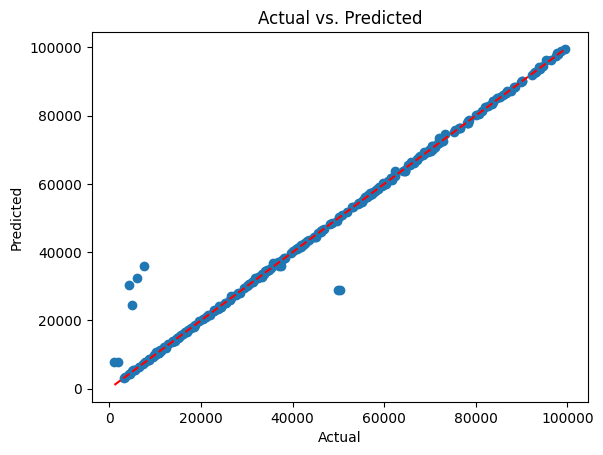

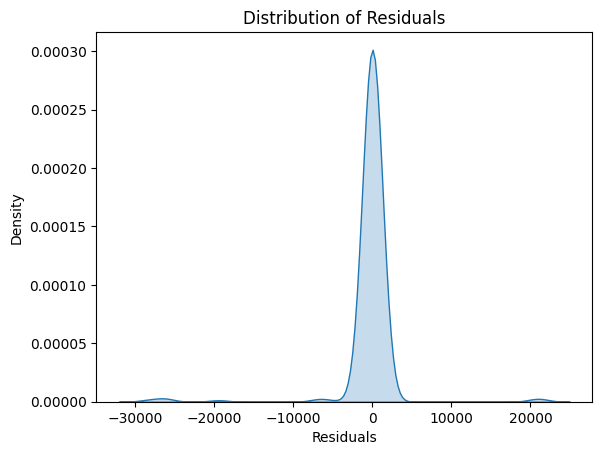

In [149]:
# Visualize y_pred against test_y
plt.scatter(test_y, y_pred_decTree)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Visualize the distribution of residuals
residuals = test_y - y_pred_decTree
sns.kdeplot(residuals, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

In [150]:
print("Mean Absolute Percentage Error (MAPE):", mape_decTree)

Mean Absolute Percentage Error (MAPE): 0.11920040365165231


In [151]:
#Random Forest regressor ML model

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
model_ranFor = RandomForestRegressor(random_state=42)
model_ranFor.fit(train_x, train_y)

# Making predictions on the test data
y_pred_ranFor = model_ranFor.predict(test_x)

In [154]:
mape_ranFor = mean_absolute_percentage_error(test_y, y_pred_ranFor)

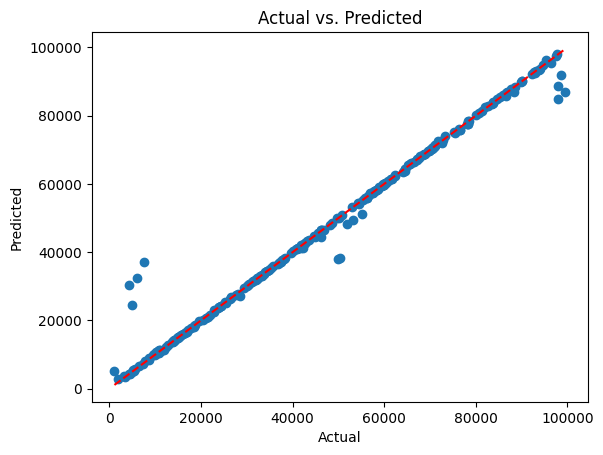

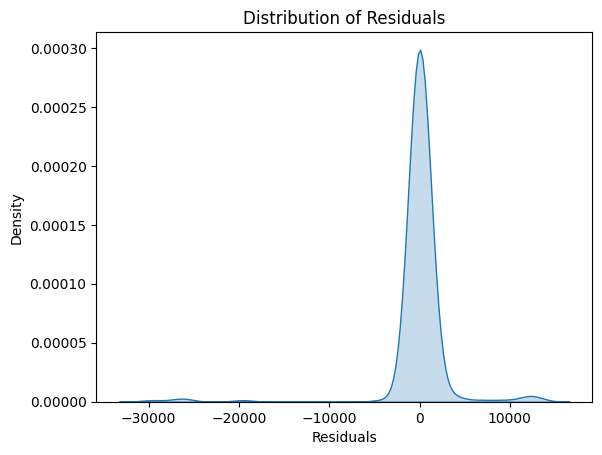

In [155]:
# Visualize y_pred against test_y
plt.scatter(test_y, y_pred_ranFor)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Visualize the distribution of residuals
residuals = test_y - y_pred_ranFor
sns.kdeplot(residuals, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

In [156]:
print("Mean Absolute Percentage Error (MAPE):", mape_ranFor)

Mean Absolute Percentage Error (MAPE): 0.10020915644228788


In [157]:
#Support Vector regressor ML model

In [158]:
from sklearn.svm import SVR

In [159]:
model_svr = SVR()
model_svr.fit(train_x, train_y)

# Making predictions
y_pred_svr = model_svr.predict(test_x)

In [160]:
mape_svr = mean_absolute_percentage_error(test_y, y_pred_svr)

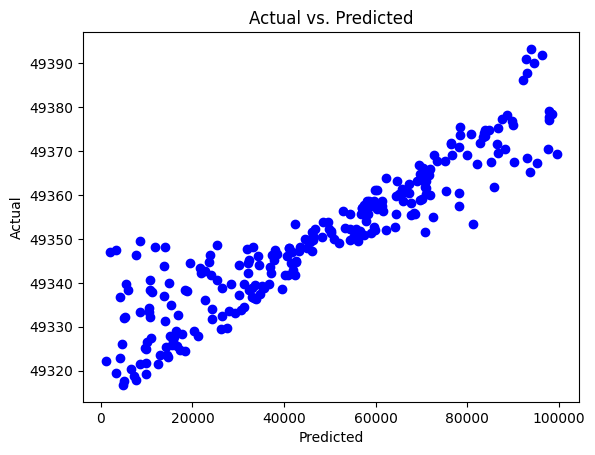

In [161]:
# Visualize y_pred against test_y
plt.scatter(test_y, y_pred_svr, color ='blue')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs. Predicted')
plt.show()

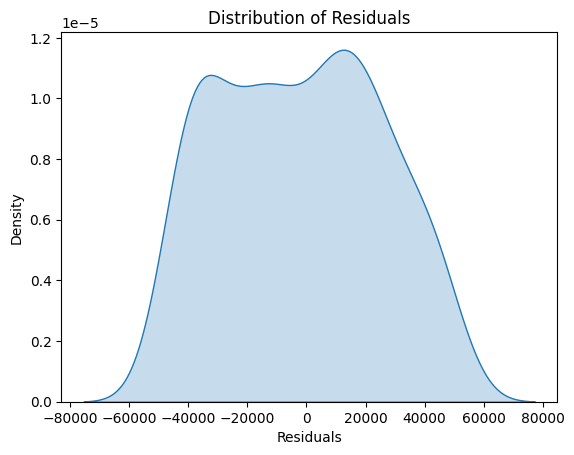

In [162]:
# Visualize the distribution of residuals
residuals = test_y - y_pred_svr
sns.kdeplot(residuals, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

In [163]:
print(f"Mean Absolute Percentage Error (MAPE): {mape_svr * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 152.84%


In [164]:
#XGBoost regressor ML model

In [165]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [166]:
from xgboost import XGBRegressor

In [167]:
xgb_model = XGBRegressor()
xgb_model.fit(train_x, train_y)

# Making predictions on the test set
y_pred_xgb = xgb_model.predict(test_x)

In [168]:
mape_xgb = mean_absolute_percentage_error(test_y, y_pred_xgb)

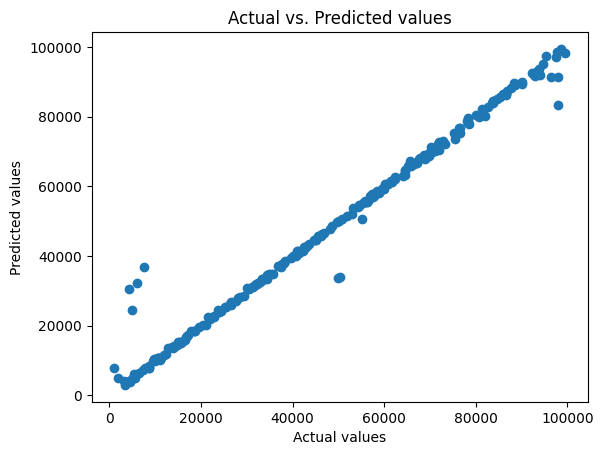

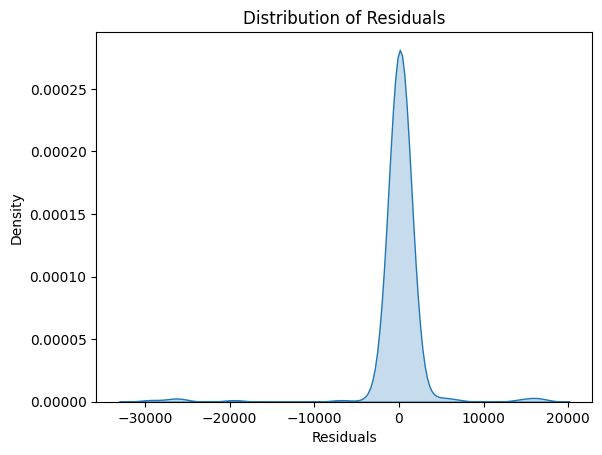

In [169]:
plt.scatter(test_y, y_pred_xgb)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.show()

# Visualizing the distribution of residuals
residuals = test_y - y_pred_xgb
sns.kdeplot(residuals, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

In [170]:
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 12.06%


In [171]:
#Logistic regression ML model

In [172]:
prep_df.head()

,order_value_EUR,cost,date,customer_name,sales_manager,sales_rep,order_id,refund,yeo_cost,customer_type,...,category_Accessories,category_Appliances,category_Beauty,category_Books,category_Clothing,category_Electronics,category_Games,category_Other,category_Outdoors,category_Smartphones
0,98320.37,77722.25,2020-08-23,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,70-0511466,43621,110.082724,regular customer,...,False,False,False,False,False,False,True,False,False,False
1,46296.26,40319.41,2020-05-15,Wisoky Inc,Othello Bowes,Amelina Piscopiello,77-3489084,13385,88.735444,loyal customer,...,False,False,False,False,False,False,True,False,False,False
2,140337.34,115708.14,2020-04-09,Hegmann Group,Celine Tumasian,Corene Shirer,65-8218141,69535,125.373080,regular customer,...,False,True,False,False,False,False,False,False,False,False
3,203604.46,175344.16,2019-06-26,Kirlin and Sons,Othello Bowes,Crysta Halls,29-5478106,90064,143.554950,regular customer,...,False,False,False,False,False,True,False,False,False,False
4,63979.04,56032.84,2019-10-22,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,27-3437546,24176,98.882944,regular customer,...,False,False,False,False,False,False,True,False,False,False


In [173]:
y_cat = prep_df['customer_type_encoded']

In [174]:
y_cat

0       0
1       1
2       0
3       0
4       0
       ..
1004    0
1005    0
1006    0
1007    1
1008    1
Name: customer_type_encoded, Length: 1009, dtype: int64

In [175]:
x_cat = prep_df.drop(['date', 'customer_name', 'sales_manager', 'sales_rep', 'order_id', 'customer_type', 'customer_type_encoded', 'yeo_cost'], axis=1)

In [176]:
x_cat.columns 

Index(['order_value_EUR', 'cost', 'refund', 'day', 'month', 'year',
       'country_Austria', 'country_Belgium', 'country_Bulgaria',
       'country_Denmark', 'country_Finland', 'country_France',
       'country_Germany', 'country_Ireland', 'country_Italy',
       'country_Luxembourg', 'country_Netherlands', 'country_Portugal',
       'country_Spain', 'country_Sweden', 'country_UK', 'device_type_Mobile',
       'device_type_PC', 'device_type_Tablet', 'category_Accessories',
       'category_Appliances', 'category_Beauty', 'category_Books',
       'category_Clothing', 'category_Electronics', 'category_Games',
       'category_Other', 'category_Outdoors', 'category_Smartphones'],
      dtype='object')

In [177]:
scaler = StandardScaler()

scaled_cat = scaler.fit_transform(x_cat)

In [178]:
scaled_cat

array([[-0.24271229, -0.32322742, -0.19543554, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [-1.08746076, -1.0471347 , -1.24782744, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [ 0.43954391,  0.41196441,  0.70652517, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       ...,
       [ 0.70337104,  0.62275272, -1.38736439, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [ 1.06349254,  1.01027712, -1.53434981, ..., -0.17202278,
        -0.22833669, -0.3223953 ],
       [ 2.97826913,  3.15587176, -1.57604731, ..., -0.17202278,
        -0.22833669, -0.3223953 ]])

In [179]:
train_x_cat, test_x_cat, train_y_cat, test_y_cat = train_test_split(scaled_cat, y_cat, test_size=0.25, random_state=42)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [181]:
model = LogisticRegression()
model.fit(train_x_cat, train_y_cat)

y_pred = model.predict(test_x_cat)

confusion = confusion_matrix(test_y_cat, y_pred)
accuracy = accuracy_score(test_y_cat, y_pred)

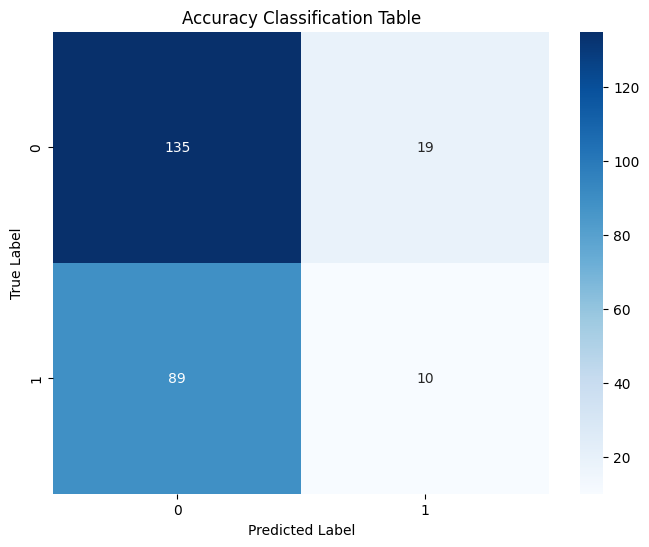

Accuracy:  0.55
Percentage of Error:  45.06%


In [237]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.title('Accuracy Classification Table')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


error_percentage = 100 * (1 - accuracy) 

print(f"Accuracy: {accuracy: .2f}")
print(f"Percentage of Error: {error_percentage: .2f}%")

In [183]:
#Decision Tree classification ML model

In [184]:
from sklearn.tree import DecisionTreeClassifier

In [185]:
model_Tree = DecisionTreeClassifier()
model_Tree.fit(train_x_cat, train_y_cat)

y_pred_Tree = model_Tree.predict(test_x_cat)

confusion_Tree = confusion_matrix(test_y_cat, y_pred_Tree)
accuracy_Tree = accuracy_score(test_y_cat, y_pred_Tree)

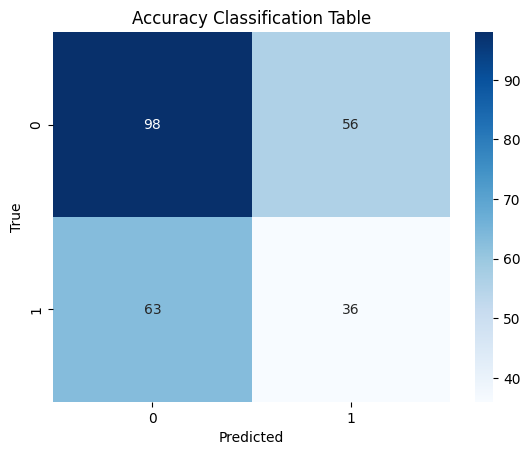

Accuracy:  0.53
Percentage of Error:  47.04%


In [186]:
sns.heatmap(confusion_Tree, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Accuracy Classification Table')
plt.show()

error_percentage_Tree = 100 * (1 - accuracy_Tree) 

print(f"Accuracy: {accuracy_Tree: .2f}")
print(f"Percentage of Error: {error_percentage_Tree: .2f}%")

In [187]:
# Random Forest classification ML model

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
model_Forest = RandomForestClassifier()
model_Forest.fit(train_x_cat, train_y_cat)

y_pred_Forest = model_Forest.predict(test_x_cat)

confusion_Forest = confusion_matrix(test_y_cat, y_pred_Forest)
accuracy_Forest = accuracy_score(test_y_cat, y_pred_Forest)

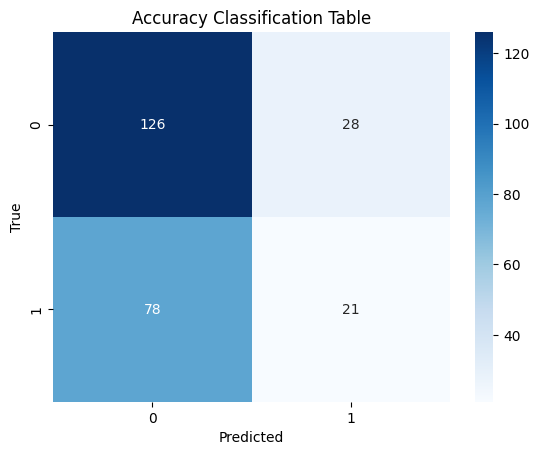

Accuracy:  0.58
Percentage of Error:  41.90%


In [190]:
sns.heatmap(confusion_Forest, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Accuracy Classification Table')
plt.show()

error_percentage_Forest = 100 * (1 - accuracy_Forest) 

print(f"Accuracy: {accuracy_Forest: .2f}")
print(f"Percentage of Error: {error_percentage_Forest: .2f}%")

In [191]:
#K Nearest Neighbours classification ML model

In [192]:
from sklearn.neighbors import KNeighborsClassifier

In [193]:
k_values = range(1, 11)
accuracies = []

In [194]:
#The k refers to the number of neighbors within which the total classification will be spread out, and
#to find the best classification that deals with the particular data most perfectly

In [195]:
#the DNN classification model requires to set the number of k to find the best prediction,
#so we are going to use the for loop to build the classification model

In [196]:
#so we are going to use the four loop to build the classification model.
#In each loop, the particular code or the model will take one value of a particular k, and then it
#will run the code or run the model based on those selected particular k, and provide us a accuracy code.

In [197]:
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_x_cat, train_y_cat)
    y_pred = model.predict(test_x_cat)
    accuracy = accuracy_score(test_y_cat, y_pred)
    accuracies.append(accuracy)

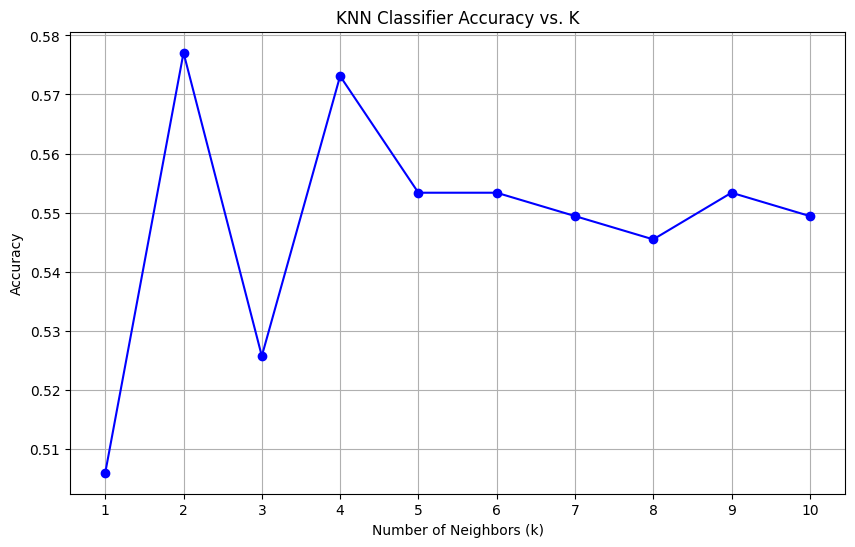

In [198]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Classifier Accuracy vs. K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

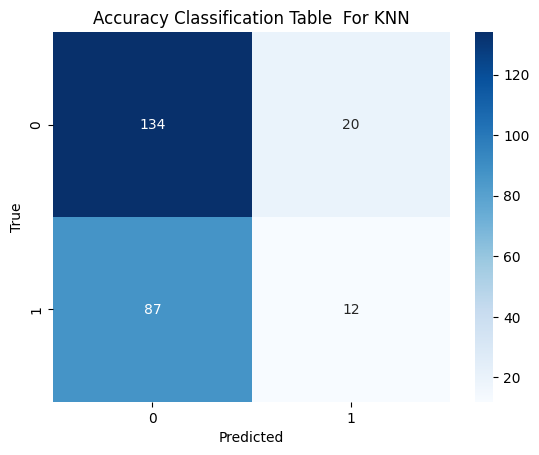

In [199]:
best_k = 2

model_KNN = KNeighborsClassifier(n_neighbors=best_k)
model_KNN.fit(train_x_cat, train_y_cat)
y_pred_KNN = model_KNN.predict(test_x_cat)

confusion_KNN = confusion_matrix(test_y_cat, y_pred_KNN)
accuracy_KNN = accuracy_score(test_y_cat, y_pred_KNN)

sns.heatmap(confusion_KNN, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Accuracy Classification Table  For KNN')
plt.show()

In [200]:
error_percentage_KNN = 100 * (1 - accuracy_KNN) 

print(f"Accuracy: {accuracy_KNN: .2f}")
print(f"Percentage of Error: {error_percentage_KNN: .2f}%")

Accuracy:  0.58
Percentage of Error:  42.29%


In [201]:
#LightGBM classification ML model

In [202]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [203]:
!pip install --force-reinstall lightgbm

  Using cached lightgbm-4.3.0-py3-none-macosx_10_15_x86_64.macosx_11_6_x86_64.macosx_12_5_x86_64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (60 kB)
Using cached lightgbm-4.3.0-py3-none-macosx_10_15_x86_64.macosx_11_6_x86_64.macosx_12_5_x86_64.whl (1.8 MB)
Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl (20.3 MB)
Using cached scipy-1.13.0-cp312-cp312-macosx_10_9_x86_64.whl (39.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.0
    Uninstalling scipy-1.13.0:
      Successfully uninstalled scipy-1.13.0
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.3.0
    Uninstalling lightgbm-4.3.0:
      Successfully uninstalled lightgbm-4.3.0


In [204]:
pip install --force-reinstall lightgbm

  Using cached lightgbm-4.3.0-py3-none-macosx_10_15_x86_64.macosx_11_6_x86_64.macosx_12_5_x86_64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (60 kB)
Using cached lightgbm-4.3.0-py3-none-macosx_10_15_x86_64.macosx_11_6_x86_64.macosx_12_5_x86_64.whl (1.8 MB)
Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl (20.3 MB)
Using cached scipy-1.13.0-cp312-cp312-macosx_10_9_x86_64.whl (39.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.0
    Uninstalling scipy-1.13.0:
      Successfully uninstalled scipy-1.13.0
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.3.0
    Uninstalling lightgbm-4.3.0:
      Successfully uninstalled lightgbm-4.3.0
Note: you 

In [205]:
!pip install lightgbm

In [206]:
pip install --upgrade lightgbm

Note: you may need to restart the kernel to use updated packages.


In [207]:
import lightgbm as lgb

In [208]:
train_data = lgb.Dataset(train_x_cat, label=train_y_cat)

In [209]:
import lightgbm
print(lightgbm.__version__)

4.3.0


In [210]:
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
}
model = lgb.train(params, train_data, num_boost_round=100)

y_pred = model.predict(test_x_cat, num_iteration=model.best_iteration)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

[LightGBM] [Info] Number of positive: 281, number of negative: 475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 756, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371693 -> initscore=-0.524960
[LightGBM] [Info] Start training from score -0.524960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [211]:
accuracy_light = accuracy_score(test_y_cat, y_pred_binary)
confusion_light = confusion_matrix(test_y_cat, y_pred_binary)

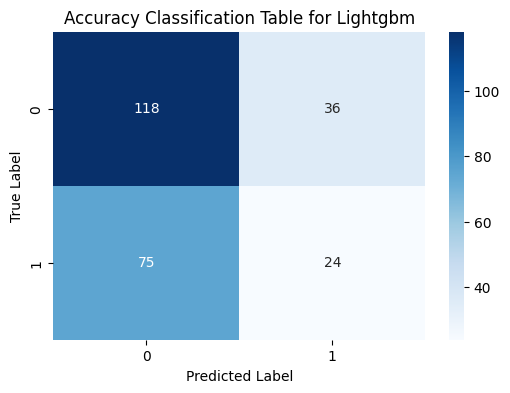

In [212]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_light, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Accuracy Classification Table for Lightgbm')
plt.show()

In [213]:
error_percentage_light = (1 - accuracy_light) * 100
print(f"Accuracy: {accuracy_light:.2f}")
print(f"Error Percentage: {error_percentage_light: .2f}%")

Accuracy: 0.56
Error Percentage:  43.87%


In [214]:
#KMeans clustering ML model

In [215]:
#In unsupervised machine learning methods, there are no target variables on which you want to make predictions based on some features.

#Rather, you will have a bunch of data and you will measure the relationship among the data and make 
#several clusters, several groups to differentiate your data based on some characteristics that will
#help you to categorize your data based on some inner or unique characteristics which are different from each other within your dataset.

In [233]:
sorted_pivot_table

,Median_Cost,Count,Median_Sales,Cluster,Customer_type
customer_name,,,,,
Johns and Sons,86679.665,142,105900.990,0,Regular Customers
Hessel-Stiedemann,80342.700,55,98322.980,0,Regular Customers
"Swaniawski, Runolfsson and Green",84690.350,25,100094.970,0,Regular Customers
"Dickinson, Hyatt and Berge",85886.100,24,104540.680,0,Regular Customers
"Murray, Reichel and Nolan",71501.100,23,88832.280,0,Regular Customers
...,...,...,...,...,...
"Parisian, Steuber and Satterfield",99724.245,2,118245.075,1,Loyal Customers
"Abbott, Roberts and Torp",81981.805,2,95588.925,0,Regular Customers
Gorczany-Lehner,26770.530,1,33724.530,0,Regular Customers


In [217]:
from sklearn.cluster import KMeans

In [222]:
num_clusters = 2

features = sorted_pivot_table 	

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

sorted_pivot_table['Cluster'] = kmeans.fit_predict(features)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [223]:
sorted_pivot_table

,Median_Cost,Count,Median_Sales,Cluster
customer_name,,,,
Johns and Sons,86679.665,142,105900.990,0
Hessel-Stiedemann,80342.700,55,98322.980,0
"Swaniawski, Runolfsson and Green",84690.350,25,100094.970,0
"Dickinson, Hyatt and Berge",85886.100,24,104540.680,0
"Murray, Reichel and Nolan",71501.100,23,88832.280,0
...,...,...,...,...
"Parisian, Steuber and Satterfield",99724.245,2,118245.075,1
"Abbott, Roberts and Torp",81981.805,2,95588.925,0
Gorczany-Lehner,26770.530,1,33724.530,0


In [230]:
sorted_pivot_table['Cluster'].value_counts()

Cluster
0    43
1    32
Name: count, dtype: int64

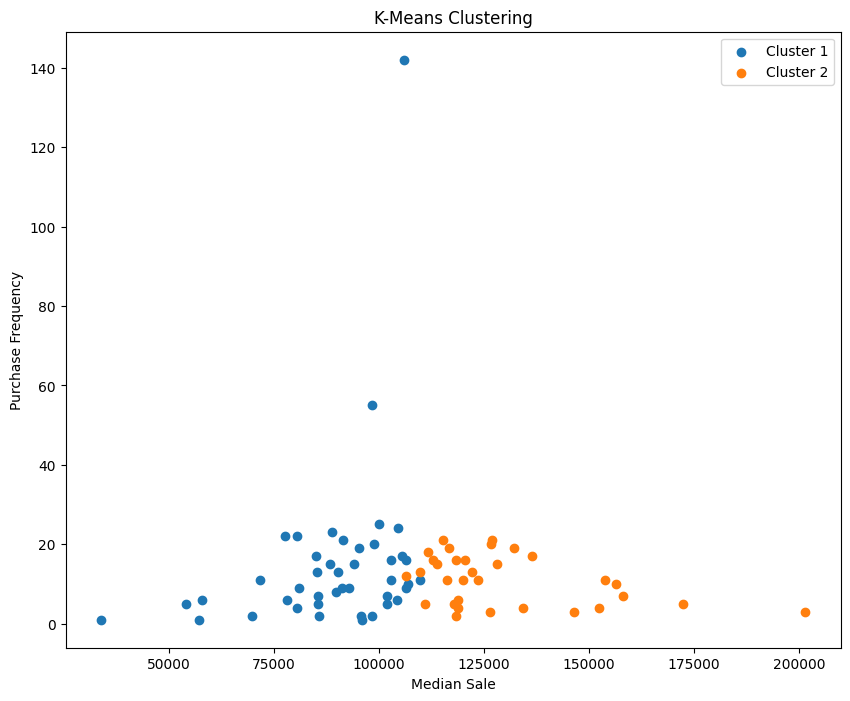

In [227]:
fig = plt.figure(figsize=(10, 8))

for cluster in range(num_clusters):
    plt.scatter(
       sorted_pivot_table[sorted_pivot_table['Cluster'] == cluster]['Median_Sales'],
        sorted_pivot_table[sorted_pivot_table['Cluster'] == cluster]['Count'],
        label=f'Cluster {cluster + 1}'
    )
       
        

plt.title('K-Means Clustering')
plt.xlabel('Median Sale')
plt.ylabel('Purchase Frequency')
plt.legend() 
plt.show()

In [234]:
sorted_pivot_table['Customer_type'] = sorted_pivot_table['Cluster'].replace({1: "Loyal Customers", 0: "Regular Customers"})

In [235]:
sorted_pivot_table

,Median_Cost,Count,Median_Sales,Cluster,Customer_type
customer_name,,,,,
Johns and Sons,86679.665,142,105900.990,0,Regular Customers
Hessel-Stiedemann,80342.700,55,98322.980,0,Regular Customers
"Swaniawski, Runolfsson and Green",84690.350,25,100094.970,0,Regular Customers
"Dickinson, Hyatt and Berge",85886.100,24,104540.680,0,Regular Customers
"Murray, Reichel and Nolan",71501.100,23,88832.280,0,Regular Customers
...,...,...,...,...,...
"Parisian, Steuber and Satterfield",99724.245,2,118245.075,1,Loyal Customers
"Abbott, Roberts and Torp",81981.805,2,95588.925,0,Regular Customers
Gorczany-Lehner,26770.530,1,33724.530,0,Regular Customers
